In [1]:
import pandas as pd
import gzip
import json
import numpy as np
import seaborn as sns
import time

In [2]:
# start time for entire notebook
start_all = time.time()

In [3]:
import random
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

In [4]:
pip install surprise

# **Reading the data set:**

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

appliances_data = getDF('/content/drive/MyDrive/Amazon Appliances/Appliances.json.gz')
appliances_metadata = getDF('/content/drive/MyDrive/Amazon Appliances/meta_Appliances.json.gz')

In [6]:
appliances_data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
602772,5.0,NaN,True,"08 10, 2017",A24A9P4F2SLTK5,B01HJH2PY0,NaN,Tana,perfect replacement for our broken one.,Five Stars,1502323200,NaN
602773,2.0,NaN,True,"08 1, 2018",A2JCB4KHBWEELW,B01HJHHEA0,NaN,CMA,"Quick delivery, did not fit my stove.",Two Stars,1533081600,NaN
602774,5.0,NaN,True,"04 13, 2018",A1LDYYVTLPP2Z5,B01HJHHEA0,NaN,Himmy,Perfect match for my oven!,Five Stars,1523577600,NaN
602775,1.0,NaN,True,"03 23, 2018",AP1M5O06IOYZ7,B01HJH92JQ,NaN,Alberto,Doesn't work with Bosch SHX33A06UC/14 dishwash...,Doesn't work with Bosch SHX33A06UC/14 dishwash...,1521763200,NaN


In [7]:
appliances_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30440,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00175338 Switch,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#1,565,533 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"June 25, 2016",$40.23,B01HJH92JQ,[],[]
30441,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00478807 Panel-Facia,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#640,724 in Tools & Home Improvement (See to...","[B004Q3XUJA, B004T0GLW8, B00K433QFY, B01HJH2PY...",{},Tools & Home Improvement,,"March 3, 2010",$95.99,B01HJH2I5G,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
30442,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00649288 Ice Maker,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#759,045 in Tools & Home Improvement (See to...","[B004XL2U1O, B002SZPM5I, B01HJH0J4S]",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",$250.79,B01HJH0J1G,[],[]
30443,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[This is an O.E.M. Authorized part. Fits with ...,,Frigidaire 316543810 Knob,[B00O9ZFAF2],,Frigidaire,"[This is an O.E.M. Authorized part, Fits with ...","[>#531,402 in Tools & Home Improvement (See to...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",$14.99,B01HJHHEA0,[https://images-na.ssl-images-amazon.com/image...,

Distribution of ratings in the appliances_data:

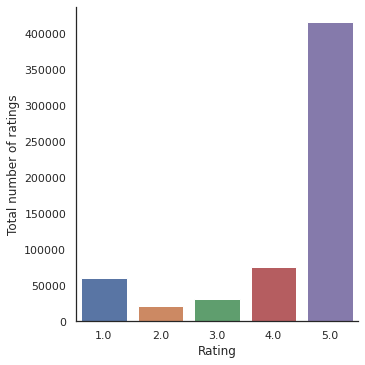

In [8]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=appliances_data,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

Extracting the year information from the column 'reviewTime':

In [9]:
# CREATING A YEAR COLUMN

def year_extractor(reviewTime):
  year = reviewTime[-4:]
  return year


appliances_data['Year'] = appliances_data['reviewTime'].apply(year_extractor)

The counts of various Years in the data. The data set is from 1998 to 2018. 

In [10]:
appliances_data['Year'].value_counts()

2016    140696
2017    135978
2015    110286
2018     77422
2014     71126
2013     38477
2012     13820
2011      7406
2010      3677
2009      1781
2008      1080
2007       640
2006       262
2005        96
2004        25
2003         2
2002         1
2000         1
2001         1
Name: Year, dtype: int64

In [11]:
from collections import Counter
time_info_all = appliances_data['reviewTime']
month_info_all = []
month_dict_all = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info_all:
  month_all = x[:2]
  month_word_all = month_dict_all[month_all]
  month_info_all.append(month_word_all)


year_info_all = []

for x in time_info_all:
  year_all = x[-4:]
  year_info_all.append(year_all)


frequency_month_all = Counter(month_info_all)
month_df_all = pd.DataFrame({"Jan": frequency_month_all['January'], "Feb":frequency_month_all['February'],
                         "Mar":frequency_month_all['March'],"Apr":frequency_month_all['April'],"May":frequency_month_all['May'],
                         "Jun":frequency_month_all['June'],"Jul":frequency_month_all['July'],"Aug":frequency_month_all['August'],
                         "Sep":frequency_month_all['September'],"Oct":frequency_month_all['September'],"Nov":frequency_month_all['November'],
                         "Dec":frequency_month_all['December']},index=[0])


In [12]:
frequency_year_all = Counter(year_info_all)
year_df_all = pd.DataFrame({'1998':frequency_year_all['1998'],'1999':frequency_year_all['1999'],
                        '2000':frequency_year_all['2000'], '2001':frequency_year_all['2001'], '2002':frequency_year_all['2002'],
                        '2003':frequency_year_all['2003'], '2004':frequency_year_all['2004'], '2005':frequency_year_all['2005'],
                        '2006':frequency_year_all['2006'], '2007':frequency_year_all['2007'], '2008':frequency_year_all['2008'],
                        '2009':frequency_year_all['2009'], '2010':frequency_year_all['2010'], '2011':frequency_year_all['2011'],
                        '2012':frequency_year_all['2012'], '2013':frequency_year_all['2013'], '2014':frequency_year_all['2014'],
                        '2015':frequency_year_all['2015'], '2016':frequency_year_all['2016'], '2017':frequency_year_all['2017'],
                        '2018':frequency_year_all['2018']}, index=[0])

Month-wise distribution of ratings in appliances_data:

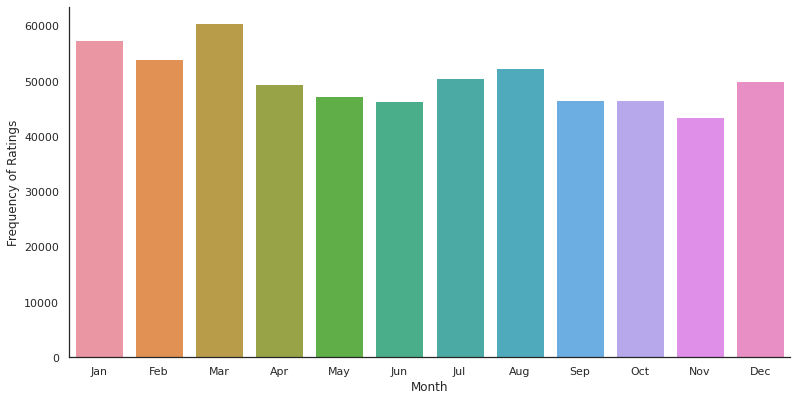

In [13]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of ratings in appliances_data:

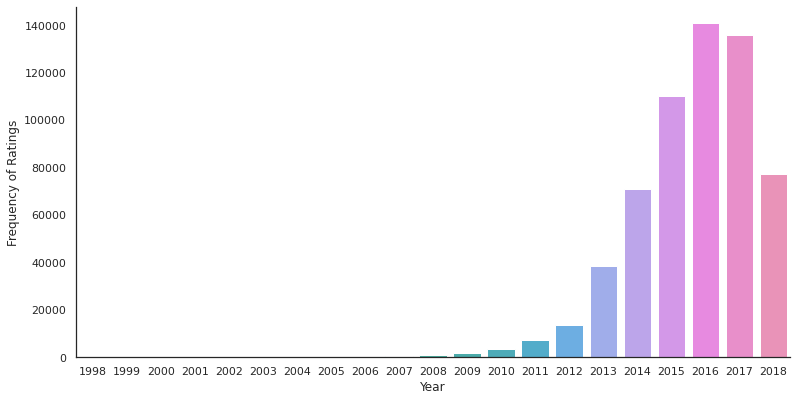

In [14]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    

We drop the data from the years 1998 to 2012, and focus our work only on the years 2013-18.

In [15]:
# Dropping data relevant to years 1998 to 2012.

appliances_data.drop(appliances_data[appliances_data['Year']=='1998'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='1999'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2000'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2001'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2002'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2003'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2004'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2005'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2006'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2007'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2008'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2009'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2010'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2011'].index, inplace=True)
appliances_data.drop(appliances_data[appliances_data['Year']=='2012'].index, inplace=True)


The counts of the five years i.e. 2013, 2014, 2015, 2016, 2017, 2018 are shown below.

In [16]:
appliances_data['Year'].value_counts()

2016    140696
2017    135978
2015    110286
2018     77422
2014     71126
2013     38477
Name: Year, dtype: int64

Considering each year as a strata, a stratified sample is taken, with 10% of data points taken from each of the 5 years.

In [17]:
# TAKING STRATIFIED SAMPLE BY TREATING EACH YEAR AS A GROUP

# stratified split dataset by column
from sklearn.model_selection import train_test_split
appliances_data_stratified = train_test_split(appliances_data, train_size = 0.1, stratify=appliances_data['Year'], random_state = 42)

The stratified data frame is displayed below.

In [18]:
appliances_data_stratified = appliances_data_stratified[0]
appliances_data_stratified

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,Year
411327,5.0,NaN,True,"11 10, 2016",A96I2RE6TTQ1V,B0167MXYT8,NaN,Darlene Gunter,Works great!,Five Stars,1478736000,NaN,2016
344077,5.0,NaN,True,"11 25, 2016",AJPHPO8ZULBET,B00NSELL2Q,NaN,Amazon Customer,This saved us serious money! Go online to see ...,Five Stars,1480032000,NaN,2016
73718,2.0,NaN,True,"03 14, 2018",APVIRB8SVMYIX,B0016HT444,"{'Size:': ' 5.1 Cubic Foot Chest Freezer', 'Co...",Coby Turner,"It works great, but it was all dented up when ...",Dented up and looks terrible but it works,1520985600,NaN,2018
289591,5.0,NaN,True,"02 11, 2015",A2A4NUBTGP8XVA,B00GTZMHOW,{'Color:': ' Non-Programmed'},",Johnny",Very good for hot pot 1.8kw very fast get wate...,Five Stars,1423612800,NaN,2015
382288,3.0,NaN,True,"02 23, 2018",A11XZRF5ZMXM35,B00WUWTX2W,{'Size:': ' 2-Pack'},KKoch,Apparently i went into the wrong business! the...,work great just pricy,1519344000,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201000,5.0,NaN,True,"04 21, 2016",AOJUZRWJM8ZC,B0078FD8FY,NaN,Fourier,Note - you need to work with Smartthings suppo...,This works great for me as I've got a minispli...,1461196800,NaN,2016
350352,4.0,NaN,True,"09 29, 2015",A18X1K2ZQKPF2L,B00OP8991Y,NaN,RALPH D PARKS,a little louder than the original one that cam...,Four Stars,1443484800,NaN,2015
134482,5.0,NaN,True,"06 24, 2016",A25V96EFVC3G8L,B004INUWX0,"{'Size:': ' 2-inch', 'Color:': ' Black'}",Erika Pastori,Easy to use leave the Hair more soft than use ...,Five Stars,1466726400,NaN,2016
372156,1.0,NaN,True,"12 1, 2016",A33GN424U6UCCU,B00V8P6WIA,NaN,C. Monroe,Will preface by saying I simply do not write r...,GARBAGE...,1480550400,NaN,2016


The counts of the years in the stratified data set is displayed below.

In [19]:
appliances_data_stratified['Year'].value_counts()

2016    14069
2017    13598
2015    11028
2018     7742
2014     7113
2013     3848
Name: Year, dtype: int64

In [20]:
from collections import Counter
time_info = appliances_data_stratified['reviewTime']
month_info = []
month_dict = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info:
  month = x[:2]
  month_word = month_dict[month]
  month_info.append(month_word)


year_info = []

for x in time_info:
  year = x[-4:]
  year_info.append(year)


frequency_month = Counter(month_info)
month_df = pd.DataFrame({"Jan": frequency_month['January'], "Feb":frequency_month['February'],
                         "Mar":frequency_month['March'],"Apr":frequency_month['April'],"May":frequency_month['May'],
                         "Jun":frequency_month['June'],"Jul":frequency_month['July'],"Aug":frequency_month['August'],
                         "Sep":frequency_month['September'],"Oct":frequency_month['September'],"Nov":frequency_month['November'],
                         "Dec":frequency_month['December']},index=[0])




In [21]:
frequency_year = Counter(year_info)
year_df = pd.DataFrame({ '2013':frequency_year['2013'], '2014':frequency_year['2014'],
                        '2015':frequency_year['2015'], '2016':frequency_year['2016'], '2017':frequency_year['2017'],
                        '2018':frequency_year['2018']}, index=[0])

Month-wise distribution of reviews in the entire stratified data set.

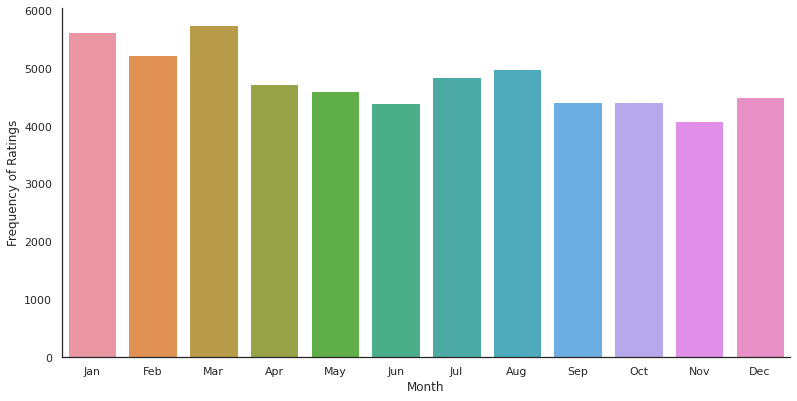

In [22]:

sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of reviews in the entire stratified data set.

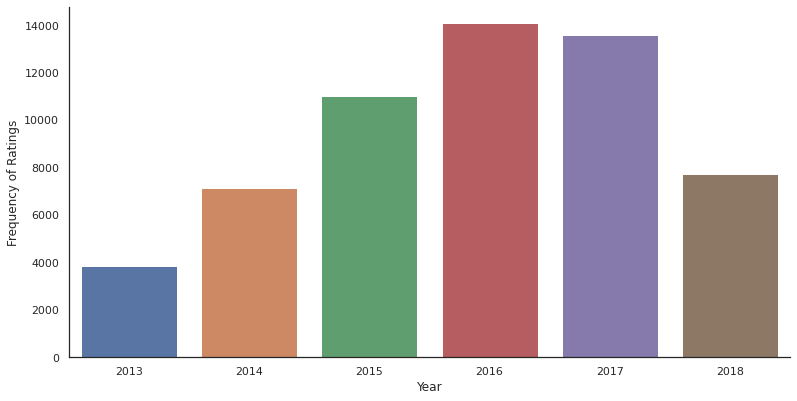

In [23]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    


Checking number of missing values across various columns.

In [24]:
print('Number of missing values across columns: \n',appliances_data_stratified.isnull().sum())

Number of missing values across columns: 
 overall               0
vote              52107
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             44119
reviewerName          1
reviewText           33
summary               9
unixReviewTime        0
image             56459
Year                  0
dtype: int64


In [25]:
print('Number of missing values across columns: \n',appliances_metadata.isnull().sum())

Number of missing values across columns: 
 category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
asin               0
imageURL           0
imageURLHighRes    0
dtype: int64


Distribution of ratings in the stratified sample data set.

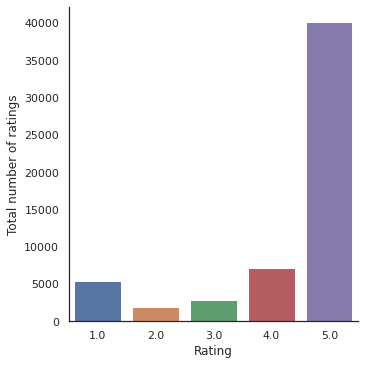

In [26]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=appliances_data_stratified,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

In [27]:
#Replacing empty lists / blanks with NaN
appliances_metadata['title'] = appliances_metadata['title'].apply(lambda y: np.nan if len(y)==0 else y)
appliances_metadata['brand'] = appliances_metadata['brand'].apply(lambda y: np.nan if len(y)==0 else y)
appliances_metadata['category'] = appliances_metadata['category'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_appliances_metadata['rank'] = cleaned_appliances_metadata['rank'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_appliances_metadata['also_view'] = cleaned_appliances_metadata['also_view'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_appliances_metadata['also_buy'] = cleaned_appliances_metadata['also_buy'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_appliances_metadata['main_cat'] = cleaned_appliances_metadata['main_cat'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_appliances_metadata['similar_item'] = cleaned_appliances_metadata['similar_item'].apply(lambda y: np.nan if len(y)==0 else y)
appliances_metadata['asin'] = appliances_metadata['asin'].apply(lambda y: np.nan if len(y)==0 else y)





In [28]:
print('Number of missing values across columns: \n',appliances_metadata.isnull().sum())

Number of missing values across columns: 
 category           806
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand              584
feature              0
rank                 0
also_view            0
details              0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
dtype: int64


In [29]:
appliances_metadata = appliances_metadata.rename(columns={"asin":"Item ID"})
appliances_data_stratified = appliances_data_stratified.rename(columns={"asin":"Item ID"})

In [30]:
len(appliances_data_stratified), len(appliances_metadata)

(57398, 30445)

Creating a combined data frame out of the metadata and the review data:

In [31]:
merged_data = pd.merge(appliances_data_stratified,appliances_metadata,on='Item ID')
# merged_data = merged_data.dropna()


In [32]:
# retaining the rows where category and brand is not missing

merged_data = merged_data[merged_data['category'].notna()]
merged_data = merged_data[merged_data['brand'].notna()]


In [33]:
print('Number of missing values across columns: \n',merged_data.isnull().sum())

Number of missing values across columns: 
 overall                0
vote               52265
verified               0
reviewTime             0
reviewerID             0
Item ID                0
style              43915
reviewerName           1
reviewText            33
summary                9
unixReviewTime         0
image              56492
Year                   0
category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
details                0
main_cat               0
similar_item           0
date                   0
price                  0
imageURL               0
imageURLHighRes        0
dtype: int64


In [34]:
merged_data

,overall,vote,verified,reviewTime,reviewerID,Item ID,style,reviewerName,reviewText,summary,unixReviewTime,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5.0,NaN,True,"11 10, 2016",A96I2RE6TTQ1V,B0167MXYT8,NaN,Darlene Gunter,Works great!,Five Stars,1478736000,NaN,2016,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,4.0,NaN,True,"12 22, 2017",AU2CLA1KQ64PZ,B0167MXYT8,NaN,Horniman Orjisson,Nice product I like it.,Four Stars,1513900800,NaN,2017,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,2.0,NaN,True,"05 27, 2018",A3NIB88DV1WA0D,B0167MXYT8,NaN,venturerider,"Ok for the price, doesnt filter as well as mor...",Ok for the price,1527379200,NaN,2018,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,1.0,2,True,"04 16, 2017",A3QH3M8TWXE800,B0167MXYT8,NaN,Eric Robert Ali,"Excellent price, but family complaints about w...",Poor quality drinking water,1492300800,NaN,2017,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,5.0,NaN,True,"11 25, 2016",AJPHPO8ZULBET,B00NSELL2Q,NaN,Amazon Customer,This saved us serious money! Go online to see ...,Five Stars,1480032000,NaN,2016,"[Appliances, Parts & Accessories, Washer Parts...","class=""a-keyvalue prodDetTable"" role=""present...",[The Frigidaire 131763202 Washer Door Lock Ass...,,Frigidaire 131763202 Washer Door Lock Assembly,"[B00DM8K1UG, B00DM8LBCI, B078GC8VPD, B079QSG55...",,Frigidaire,"[Washer door lock assembly, Fits models: GLTF1...","[>#25,171 in Tools & Home Improvement (See top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 26, 2010",$25.66,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58540,5.0,NaN,True,"11 16, 2015",ADOQU1PQAA40W,B00EMZ9GQS,NaN,Frosty,Worked perfectly.,Worked perfectly!,1447632000,NaN,2015,"[Appliances, Parts & Accessories, Cooktop Part...","class=""a-keyvalue prodDetTable"" role=""present...","[40-440, FLUSH CLOSER WITH HOOK. Refrigeration...",,Refrigeration Hardware Supply 40-440 Flush Clo...,[],,Refrigeration Hardware Supply,"[Genuine OEM replacement part, Refrigeration H...","[>#2,053,779 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"August 15, 2013

In [35]:
counts_of_users = merged_data['reviewerID'].value_counts()
counts_of_users

A25C30G90PKSQA    23
A2LDP3A4IE9T6T    22
A2B2JVUX5YN8RU    22
A1IT56MV1C09VS    21
AMY6O4Z9HINO0     20
                  ..
A2T9ABAABJUOS2     1
A32X4FFC8JZ494     1
A1CKJLWNP2HPH5     1
A3R33FDXPYO9IF     1
A43KNY3DYCRI       1
Name: reviewerID, Length: 54864, dtype: int64

In [36]:
counts_of_users = dict(filter(lambda x: x[1] >= 5,counts_of_users.items()))

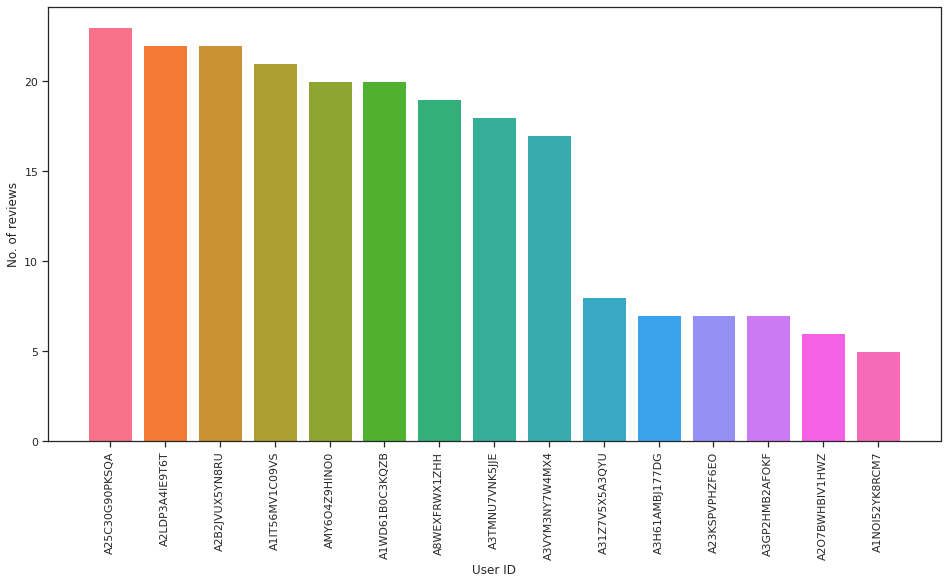

In [37]:
import matplotlib.pyplot as plt

ind = np.arange(len(counts_of_users))
palette = sns.color_palette("husl", len(counts_of_users))
plot = plt.figure(figsize=(16, 8))
plot = plt.bar(ind, list(counts_of_users.values()), color=palette)


plot = plt.xticks(ind, list(counts_of_users.keys()))
plot = plt.ylabel("No. of reviews")
plot = plt.xlabel("User ID")
plot = plt.xticks(rotation = 90)
plot = plt.show()



Trying to extract a list of all unique categories in the data set

In [38]:
cat_list = np.unique(merged_data['category'])
cat_list

array([list(['Appliances', 'Dishwashers']),
       list(['Appliances', 'Dishwashers', 'Built-In Dishwashers']),
       list(['Appliances', 'Dishwashers', 'Portable & Countertop Dishwashers']),
       list(['Appliances', 'Garbage Disposals & Compactors']),
       list(['Appliances', 'Garbage Disposals & Compactors', 'Trash Compactors']),
       list(['Appliances', 'Laundry Appliances']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers', 'All-in-One Combination Washers & Dryers']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers', 'Dryers']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers', 'Specialty Laundry']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers', 'Stacked Washer & Dryer Units']),
       list(['Appliances', 'Laundry Appliances', 'Washers & Dryers', 'Washers']),
       list(['Appliances', 'Laundry Appliances', 'Washers &amp; Dry

In [39]:
mass_category_list = []
for c in cat_list:
  # each 'c' is a list of categories
  for i in c[1:2]: # since otherwise weird "categories" come in
    mass_category_list.append(i)

list_of_all_categories = np.unique(mass_category_list)

In [40]:
list_of_all_categories

array(['Dishwashers', 'Garbage Disposals & Compactors',
       'Laundry Appliances', 'Parts & Accessories',
       'Parts &amp; Accessories', 'Ranges, Ovens & Cooktops',
       'Ranges, Ovens &amp; Cooktops',
       'Refrigerators, Freezers & Ice Makers',
       'Refrigerators, Freezers &amp; Ice Makers'], dtype='<U40')

In [41]:
# replacing '&amp' and '&amp;' with '&'
proper_syntaxed_category_list = []
for cat in list_of_all_categories:
  if '&amp;' in cat.split():
    x = cat.replace('&amp;','&')
  elif '&amp' in cat.split():
    x = cat.replace('&amp','&')
  else:
    x = cat

  proper_syntaxed_category_list.append(x)

In [42]:
list_of_all_categories = np.unique(proper_syntaxed_category_list)

LIST OF ALL CATEGORIES:

In [43]:
list_of_all_categories

array(['Dishwashers', 'Garbage Disposals & Compactors',
       'Laundry Appliances', 'Parts & Accessories',
       'Ranges, Ovens & Cooktops', 'Refrigerators, Freezers & Ice Makers'],
      dtype='<U36')

In [44]:
category_column = []

for index, row in merged_data.iterrows():
  cats = row['category']
  category_of_current_row = cats[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column.append(np.nan)

We add a column 'Category of appliances' in both the merged_data and appliances_data_stratified data frames.

In [45]:
category_column_for_metadata = []
# retaining the rows where category and brand is not missing

appliances_metadata = appliances_metadata[appliances_metadata['category'].notna()]
appliances_metadata = appliances_metadata[appliances_metadata['brand'].notna()]

for index, row in appliances_metadata.iterrows():
  temp = row['category']
  category_of_current_row = temp[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column_for_metadata.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column_for_metadata.append(np.nan)


appliances_metadata['Category of appliances'] = category_column_for_metadata

# retaining rows where category of appliances is not missing
appliances_metadata = appliances_metadata[appliances_metadata['Category of appliances'].notna()]


In [46]:
merged_data['Category of appliances'] = category_column

In [47]:
merged_data['Category of appliances'].value_counts()

Parts & Accessories                     48302
Refrigerators, Freezers & Ice Makers     3010
Ranges, Ovens & Cooktops                 2355
Laundry Appliances                       1429
Dishwashers                               395
Garbage Disposals & Compactors             28
Name: Category of appliances, dtype: int64

Plot of distribution of categories in stratified_data set:

<Figure size 720x360 with 0 Axes>

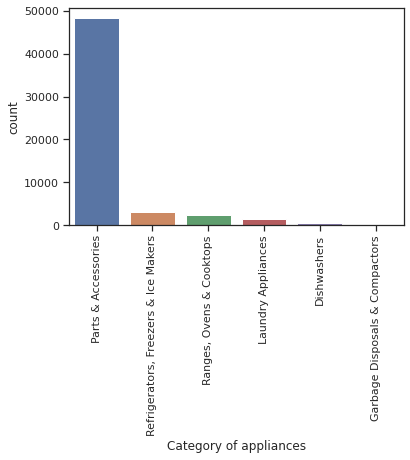

<Figure size 720x360 with 0 Axes>

In [48]:


from matplotlib import pyplot as plt


plot = sns.countplot(x='Category of appliances', data=merged_data)

plt.setp(plot.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))


In [49]:
final_list_of_categories = list(list_of_all_categories)
# final_list_of_categories.remove('Games')

In [50]:
final_list_of_categories

['Dishwashers',
 'Garbage Disposals & Compactors',
 'Laundry Appliances',
 'Parts & Accessories',
 'Ranges, Ovens & Cooktops',
 'Refrigerators, Freezers & Ice Makers']

In [51]:
# retaining rows where 'Category of appliances' is not 'NaN'
merged_data = merged_data[merged_data['Category of appliances'].notna()]

In [52]:
# appliances_metadata = appliances_metadata[appliances_metadata['Category of appliances']!='Games']
appliances_metadata.reset_index(drop=True, inplace=True)
appliances_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,Item ID,imageURL,imageURLHighRes,Category of appliances
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[],"Refrigerators, Freezers & Ice Makers"
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"Refrigerators, Freezers & Ice Makers"
2,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
3,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[],Parts & Accessories
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5050 B01-0-000 Electrical Receptacle, ...","[B000BPFZHM, B000FP8LK6, B07D5RQ5YL, B00002N7I...",,Leviton,"[N/A, Made in USA, Built of durable thermoplas...","[>#155,450 in Tools & Home Improvement (See to...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","November 9, 1999",$6.98,B00002N7HY,[],[],Parts & Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28799,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00175338 Switch,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#1,565,533 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"June 25, 2016",$40.23,B01HJH92JQ,[],[],Parts & Accessories
28800,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00478807 Panel-Facia,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#640,724 in Tools & Home Improvement (See to...","[B004Q3XUJA, B004T0GLW8, B00K433QFY, B01HJH2PY...",{},Tools & Home Improvement,,"March 3, 2010",$95.99,B01HJH2I5G,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
28801,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...",[This is an authorized aftermarket product. Fi...,,Bosch 00649288 Ice Maker,[],,Bosch,"[This is an O.E.M. Authorized part, Fits with ...","[>#759,045 in Tools & Home Improvement (See to...","[B004XL2U1O, B002SZPM5I, B01HJH0J4S]",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",$250.79,B01HJH0J1G,[],[],Parts & Accessories
28802,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-key

In [53]:
merged_data.reset_index(drop = True, inplace = True)
merged_data

,overall,vote,verified,reviewTime,reviewerID,Item ID,style,reviewerName,reviewText,summary,unixReviewTime,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,Category of appliances
0,5.0,NaN,True,"11 10, 2016",A96I2RE6TTQ1V,B0167MXYT8,NaN,Darlene Gunter,Works great!,Five Stars,1478736000,NaN,2016,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
1,4.0,NaN,True,"12 22, 2017",AU2CLA1KQ64PZ,B0167MXYT8,NaN,Horniman Orjisson,Nice product I like it.,Four Stars,1513900800,NaN,2017,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
2,2.0,NaN,True,"05 27, 2018",A3NIB88DV1WA0D,B0167MXYT8,NaN,venturerider,"Ok for the price, doesnt filter as well as mor...",Ok for the price,1527379200,NaN,2018,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
3,1.0,2,True,"04 16, 2017",A3QH3M8TWXE800,B0167MXYT8,NaN,Eric Robert Ali,"Excellent price, but family complaints about w...",Poor quality drinking water,1492300800,NaN,2017,"[Appliances, Parts & Accessories, Refrigerator...",,[<h1>Golden Icepure 4396508 refrigerator water...,,ICEPURE Whirlpool 4396508; 4392857 4396547; 46...,[B07JKVQJDJ],,ICEPURE,[Certified NSF42 by NSF And WQAGolden Icepure ...,"[>#71,173 in Tools & Home Improvement (See Top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...",,$7.81,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Parts & Accessories
4,5.0,NaN,True,"11 25, 2016",AJPHPO8ZULBET,B00NSELL2Q,NaN,Amazon Customer,This saved us serious money! Go online to see ...,Five Stars,1480032000,NaN,2016,"[Appliances, Parts & Accessories, Washer Parts...","class=""a-keyvalue prodDetTable"" role=""present...",[The Frigidaire 131763202 Washer Door Lock Ass...,,Frigidaire 131763202 Washer Door Lock Assembly,"[B00DM8K1UG, B00DM8LBCI, B078GC8VPD, B079QSG55...",,Frigidaire,"[Washer door lock assembly, Fits models: GLTF1...","[>#25,171 in Tools & Home Improvement (See top...",[],{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 26, 2010",$25.66,[],[],Parts & Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55514,5.0,NaN,True,"11 16, 2015",ADOQU1PQAA40W,B00EMZ9GQS,NaN,Frosty,Worked perfectly.,Worked perfectly!,1447632000,NaN,2015,"[Appliances, Parts & Accessories, Cooktop Part...","class=""a-keyvalue prodDetTable"" role=""present...","[40-440, FLUSH CLOSER WITH HOOK. Refrigeration...",,Refrigeration Hardware Supply 40-440 Flush Clo...,[],,Refrigeration Hardware Supply,"[Genuine OEM replacement

In [54]:
# merged_data.to_csv('/content/drive/MyDrive/Amazon appliances/Amazon appliances All Data.csv')

In [55]:
# appliances_metadata.to_csv('/content/drive/MyDrive/Amazon appliances/Amazon appliances Product Meta Data.csv')

# **Recommendations based on popularity of products:**

Getting counts of every item, i.e. the number of times an item was reviewed:

In [56]:
merged_data['Item ID'].value_counts()

B000AST3AK    563
B004UB1O9Q    541
B0014CN8Y8    362
B00KJ07SEM    332
B0045LLC7K    290
             ... 
B00YD2U56A      1
B00BLDHHOC      1
B00TRJT4D4      1
B008M2TGL2      1
B001KSO23M      1
Name: Item ID, Length: 10404, dtype: int64

Saving the above in a dictionary:

In [57]:
# items_dict is already sorted
items_dict = merged_data['Item ID'].value_counts()

## **Most Popular 'n' products recommender:**

The function most_popular_n_recommender(n) returns the most popular 'n' products, popularity being measured by the no. of times a product was bought / reviewed.

In [58]:
def most_popular_n_recommender(n):
  top_n_items_dict = items_dict[:n]
  top_n_items = list(top_n_items_dict.keys())
  relevant_counts_from_input_category = list(dict(items_dict).values())
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # making a data frame format of the top_n_items

  top_n_items_df = pd.DataFrame({"Item ID":top_n_items,
                                 "No. of times bought": relevant_counts_from_input_category_n})
  
  output_df = pd.merge(appliances_metadata,top_n_items_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of appliances'],
                            "No. of times bought": output_df['No. of times bought']})
  

  output_df = output_df.sort_values(by='No. of times bought',ascending=False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df

In [59]:
most_popular_n_recommender(10)

,Item ID,Title,Brand,Category,No. of times bought
0,B000AST3AK,General Electric MWF Refrigerator Water Filter,GE,Parts & Accessories,563
1,B004UB1O9Q,Samsung Genuine DA29-00020B Refrigerator Water...,Samsung,Parts & Accessories,541
2,B0014CN8Y8,Gardus RLE202 LintEater Rotary Dryer Vent Cle...,LintEater,Parts & Accessories,362
3,B00KJ07SEM,GE MWF SmartWater Compatible Water Filter Cart...,Waterfall Filter,Parts & Accessories,332
4,B0045LLC7K,Frigidaire WF3CB Puresource Replacement Filter...,Frigidaire,Parts & Accessories,290
5,B001B35APA,AcuRite 00611A3 Wireless Indoor/Outdoor Thermo...,AcuRite,Parts & Accessories,253
6,B0002YTM0I,Broan 413004 ADA Capable Non-Ducted Under-Cabi...,Broan,"Ranges, Ovens & Cooktops",252
7,B0002YTM0I,Broan 413004 ADA Capable Non-Ducted Under-Cabi...,Broan,"Ranges, Ovens & Cooktops",252
8,B00E37TQV0,EcoAqua DA29-00020B Replacement for Samsung Wa...,EcoAqua,Parts & Accessories,247
9,B0000CFPK8,"Reston Lloyd Electric Stove Burner Covers, Set...",Reston Lloyd,Parts & Accessories,226


## **Most popular 'n' products recommender, based on an input 'category':**

Given a category, 'n' most popular products from the given category is displayed.

In [60]:
def most_popular_n_recommender_category_wise(n, input_category):
  # group appliances review data by all categories
  grouped_appliances_data = merged_data.groupby(by = 'Category of appliances')

  # get the data relevant to the input_category
  input_category_df = grouped_appliances_data.get_group(input_category)

  # getting counts of how many times each item was bought

  items_dict_category_wise = input_category_df['Item ID'].value_counts()

  # storing only the item IDs
  # this is sorted already in descending order of 'no. of times bought'
  relevant_items_from_input_category = list(items_dict_category_wise.keys())
  relevant_counts_from_input_category = list(dict(items_dict_category_wise).values()) 
  
  # taking only the first n item IDs

  relevant_items_from_input_category_n = relevant_items_from_input_category[:n]
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # getting the corresponding product metadata

  top_n_items_category_wise_df = pd.DataFrame({"Item ID":relevant_items_from_input_category_n, 
                                               "No. of times bought":relevant_counts_from_input_category_n })
  
  output_df = pd.merge(appliances_metadata,top_n_items_category_wise_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of appliances'],
                            "No. of times bought":output_df['No. of times bought']})
  
  output_df = output_df.drop_duplicates()
  output_df = output_df.sort_values(by = 'No. of times bought', ascending = False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df



In [61]:
most_popular_n_recommender_category_wise(5, 'Parts & Accessories')

,Item ID,Title,Brand,Category,No. of times bought
0,B000AST3AK,General Electric MWF Refrigerator Water Filter,GE,Parts & Accessories,563
1,B004UB1O9Q,Samsung Genuine DA29-00020B Refrigerator Water...,Samsung,Parts & Accessories,541
2,B0014CN8Y8,Gardus RLE202 LintEater Rotary Dryer Vent Cle...,LintEater,Parts & Accessories,362
3,B00KJ07SEM,GE MWF SmartWater Compatible Water Filter Cart...,Waterfall Filter,Parts & Accessories,332
4,B0045LLC7K,Frigidaire WF3CB Puresource Replacement Filter...,Frigidaire,Parts & Accessories,290


## **Most popular 'n' products, from all of the 6 categories:**

Most popular 'n' products from each of the 6 categories is displayed.



In [62]:
def most_popular_n_products_all_categories(n):

  # empty list for storing data frames relevant to each category
  df_list = []
  for cat in final_list_of_categories:
    temp = most_popular_n_recommender_category_wise(n, cat)

    # temp stores the most popular 'n' products from the category 'cat'

    # storing temp in the df_list for later

    df_list.append(temp)

  # creating a data frame out of all the individual category-wise data frames
  output_df = pd.concat(df_list)
  output_df.reset_index(drop = True, inplace = True)
  return output_df


In [63]:
most_popular_n_products_all_categories(2)

,Item ID,Title,Brand,Category,No. of times bought
0,B004N4MSPO,"SPT Countertop Dishwasher, Silver",SPT,Dishwashers,43
1,B0052FXC9Y,Danby DDW611WLED Countertop Dishwasher - White,Danby,Dishwashers,35
2,B00AVCBYK2,Heavy Duty Trash Compactor Bags - 60 Count - F...,FKE,Garbage Disposals & Compactors,16
3,B001PN4RU0,Broan 15&quot; Trash Compactor - Stainless Ste...,Broan,Garbage Disposals & Compactors,3
4,B002C8HR9A,The Laundry Alternative Wonderwash Non-electri...,The Laundry Alternative,Laundry Appliances,106
5,B00AW04ZMM,Panda Small Compact Portable Washing Machine 7...,Panda,Laundry Appliances,77
6,B000AST3AK,General Electric MWF Refrigerator Water Filter,GE,Parts & Accessories,563
7,B004UB1O9Q,Samsung Genuine DA29-00020B Refrigerator Water...,Samsung,Parts & Accessories,541
8,B0002YTM0I,Broan 413004 ADA Capable Non-Ducted Under-Cabi...,Broan,"Ranges, Ovens & Cooktops",252
9,B00DT5746Q,Disney Ariel Little Mermaid Birthday Party Sce...,Amscan,"Ranges, Ovens & Cooktops",161


# **Preparing data-frame 'surprise_data', for implementing algorithms from surpriseLib.**

Oversampling is done from the groups of rating 4.0, 3.0, 2.0 and 1.0 - since they have very low frequency compared to ratings of 5.0.
A balanced data set is constructed to train the algorithm.

The idea here behind the manual oversampling, was to replicate each group of ratings (1.0, 2.0, 3.0, 4.0) an appropriate number of times, so as to have fairly the same number of data points as the group 5.0

In [64]:
surprise_data = pd.DataFrame ({"User ID":merged_data.reviewerID,"Item ID":merged_data['Item ID'],"Ratings":merged_data.overall})

In [65]:
#surprise_data = surprise_data.dropna()

In [66]:
grouped_sd = surprise_data.groupby('Ratings')
group_five = grouped_sd.get_group(5.0)
# group_five = group_five.sample(frac=1, replace=False, random_state=1)
group_5 = group_five

In [67]:
group_four = grouped_sd.get_group(4.0)
group_three = grouped_sd.get_group(3.0)
group_two = grouped_sd.get_group(2.0)
group_one = grouped_sd.get_group(1.0)

In [68]:
#group_five

In [69]:

count_five = len(group_5)
def get_replicator_value(group_x):
  count_x = len(group_x)
  k=1
  sum = 0
  while sum < count_five:
    sum = sum + count_x
    k=k+1

  return k-2


In [70]:
group_4 = pd.concat([group_four]*get_replicator_value(group_four),ignore_index=True)

In [71]:
group_3 = pd.concat([group_three]*get_replicator_value(group_three),ignore_index=True)


In [72]:
group_2 = pd.concat([group_two]*get_replicator_value(group_two),ignore_index=True)


In [73]:
group_1 = pd.concat([group_one]*get_replicator_value(group_one),ignore_index=True)


In [74]:
surprise_data_balanced = pd.concat([group_5,group_4,group_3,group_2,group_1])
surprise_data_balanced = surprise_data_balanced.sample(frac=1,random_state=42)
surprise_data_balanced

,User ID,Item ID,Ratings
19935,A3TU5AQZZC73AP,B00DVPRPWM,2.0
16080,A2XEE44UWYDNPO,B004XTKIWE,4.0
42693,A1UZLBQL5E5ZNU,B00RXZJLIM,5.0
26007,A1QS9L9LXT0HZI,B016S0OH90,2.0
27074,A2GUNEAWH8OCMX,B001769IVI,3.0
...,...,...,...
9000,A3QZLOSTOILBQ8,B00KVNSR1A,2.0
30489,ACRJDNGTLWBT8,B00UUCFERM,3.0
21053,A3ASPBY2YMU8RS,B00E0CWU02,2.0
35988,APM36KSVTBITV,B004JNU22A,2.0


### **Data set is now balanced with respect to the five classes of ratings:**

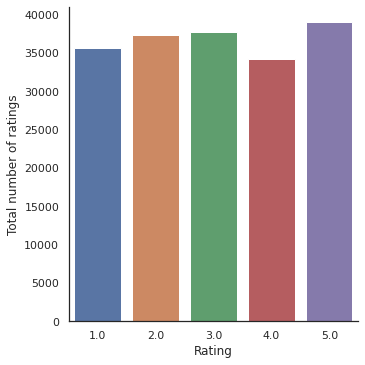

In [75]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="Ratings", data=surprise_data_balanced,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

The data is split into train and test sets, with 25% being kept aside for testing.

In [76]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(surprise_data_balanced,test_size=0.25, random_state = 42)

# doing the split with sklearn and not surpriseLib so that we can drop duplicates from the test_df to avoid inflating accuracy metrics, etc.

In [77]:
test_df = test_df.drop_duplicates()
test_df

,User ID,Item ID,Ratings
47662,A1WW3GPEU5TS60,B00DZU8S1A,5.0
5679,A2SH2VNCNZC24S,B0000YDY90,5.0
20206,AQ967CTP5PFQV,B0050O1Z8M,2.0
33180,ACRJDNGTLWBT8,B00UUCFERM,3.0
7621,A3RQDVSB5HB3QH,B00INXG9MY,5.0
...,...,...,...
16527,A1PLSO1BE5VPSP,B00NO7OGCO,4.0
25800,A1NP06RQWSJD6R,B01FT50EA6,5.0
31206,A1KVPGG371YKYY,B00INXG9MY,1.0
17352,AGYZDIFOWM7OZ,B00AF7U1F2,1.0


In [78]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))

In [79]:
from surprise import Dataset
# The columns must correspond to user id, item id and ratings (in that order)
train_surprise_data = Dataset.load_from_df(train_df, reader)
test_surprise_data = Dataset.load_from_df(test_df, reader)

In [80]:
len(np.unique(merged_data['reviewerID'])), len(np.unique(merged_data['Item ID']))

(53488, 10404)

# **Constructing a Recommender function to call all algorithms:**

In [81]:
# first import the modules required for all the algorithms

from surprise import accuracy
from surprise import BaselineOnly
from surprise import NormalPredictor
from surprise import SVD
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import KNNWithZScore
from surprise import NMF
from surprise import SVDpp
from surprise import SlopeOne
from surprise import CoClustering
from surprise.model_selection import train_test_split
trainset, fake_testset = train_test_split(train_surprise_data,test_size=0.01,random_state=42)
fake_trainset, testset = train_test_split(test_surprise_data, test_size=1.0,random_state=42)
# the train_test_split from surprise does not allow train_size = 1.0, or test_size = 0.0, hence test_size = 0.01 is used.

In [82]:
from collections import defaultdict

global rmse_scores
global accuracy_scores
global mean_absolute_error
rmse_scores = defaultdict(list)
accuracy_scores = defaultdict(list)
mean_absolute_error = defaultdict(list)

Two functions are defined, recommender(algo_string) and get_result(predictions, algo_string), which will be called later to implement each of the algorithms in surpriseLib. While recommender(algo_string) returns the object of the form 'algo()', get_result(predictions, algo_string) returns a data frame of the predictions on the test set. 'algo_string' is the paramater for the name of an algorithm from surpriseLib.

In [83]:
#This is just choosing the algorithm to implement and returning that object 'algo()'

def recommender(algo_string):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)
  # algo is a string denoting the algo to be implemented

  if algo_string == 'SVD':
    algo = SVD()

  elif algo_string == 'SVDpp':
    algo = SVDpp()

  elif algo_string == 'SlopeOne':
    algo = SlopeOne()

  elif algo_string == 'CoClustering':
    algo = CoClustering()

  elif algo_string == 'KNNBasic':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBasic(sim_options=sim_options)

  elif algo_string == 'KNNWithZScore':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithZScore(sim_options=sim_options)

  elif algo_string == 'KNNBaseline':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBaseline(sim_options=sim_options)   
  
  elif algo_string == 'KNNWithMeans':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithMeans(sim_options=sim_options)

  elif algo_string == 'NMF':
    algo = NMF()

  elif algo_string == 'BaselineOnly':
    algo = BaselineOnly()

  elif algo_string == 'NormalPredictor':
    algo = NormalPredictor()

  return algo

In [84]:
def get_result(predictions,algo_string):
  rmse_score = round(accuracy.rmse(predictions),4)

  n = len(predictions)

  User_ID=n*[0]
  Item_ID=n*[0]
  True_Rating=n*[0]
  Predicted_Rating=n*[0]
  Absolute_Error=n*[0]
  Rounded_Off_Predicted_Rating = n*[0]
  Classification = n*[0]
  for i in range(n):
    User_ID[i] = predictions[i].uid
    Item_ID[i] = predictions[i].iid
    True_Rating[i] = predictions[i].r_ui
    Predicted_Rating[i] = predictions[i].est 
    Absolute_Error[i] = abs(predictions[i].est-predictions[i].r_ui)
    Rounded_Off_Predicted_Rating[i] = round(predictions[i].est,0)

    if True_Rating[i] == Rounded_Off_Predicted_Rating[i]:
      Classification[i] = 1
    else:
      Classification[i] = 0
  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,"True Rating":True_Rating,
                           "Predicted Rating":Predicted_Rating,
                            "Rounded Off Predicted Rating":Rounded_Off_Predicted_Rating,
                           "Absolute Error":Absolute_Error, "Is the predicted rating correct?": Classification})
  
  Result = Result.sort_values(by='Absolute Error')

  # Accuracy Calculation
  x = Result['Is the predicted rating correct?'].value_counts()
  right = x[1]
  wrong = x[0]
  accuracy_score = round((right / (right + wrong)) * 100, 4)

  rmse_scores[algo_string] = rmse_score
  accuracy_scores[algo_string] = accuracy_score
  mean_absolute_error[algo_string] = Result['Absolute Error'].sum()/len(Result)
  

  return Result

In [85]:
global time_dict_of_models
time_dict_of_models = defaultdict(list)

# this dict stores the time taken (in seconds) by each model

# **CALLING ALL ALGORITHMS IN SURPRISE LIB:**

The name of every algorithm is displayed, along with the predictions as well as a histogram of the absolute error of the predicted ratings.

# **BaselineOnly:**

In [86]:
start_baseline_only = time.time()
algo_baseline_only = recommender('BaselineOnly')

algo_baseline_only.fit(trainset)
predictions_baseline_only = algo_baseline_only.test(testset)

end_baseline_only = time.time()
time_dict_of_models['BaselineOnly'] = end_baseline_only - start_baseline_only

Estimating biases using als...


In [87]:
Result_baseline_only = get_result(predictions_baseline_only,'BaselineOnly')
Result_baseline_only

RMSE: 1.3075


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
18798,A3VGK7BO4YO79Y,B0009H60BM,3.0,3.000218,3.0,0.000218,1
20042,A19SZ5IRG68SYY,B00UD83Y7A,3.0,3.000348,3.0,0.000348,1
17056,APY7WIFN12VR5,B00UD83Y7A,3.0,3.000348,3.0,0.000348,1
19816,A3BH5SU4FKQZQH,B00UD83Y7A,3.0,3.000361,3.0,0.000361,1
20239,A2C1SSE4MH5H3E,B00UD83Y7A,3.0,3.000361,3.0,0.000361,1
...,...,...,...,...,...,...,...
23477,A1D19QMU5HFMD1,B00M0YXT0W,5.0,1.925902,2.0,3.074098,0
18761,A3JA523YV0UB28,B00IS93X22,5.0,1.917904,2.0,3.082096,0
8226,A2OFMBHNWAELN6,B01AYKYCSQ,5.0,1.853471,2.0,3.146529,0
3608,A3MIUC0O8EAJI4,B00C9YTN08,5.0,1.817814,2.0,3.182186,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3cf02d0>]],
      dtype=object)

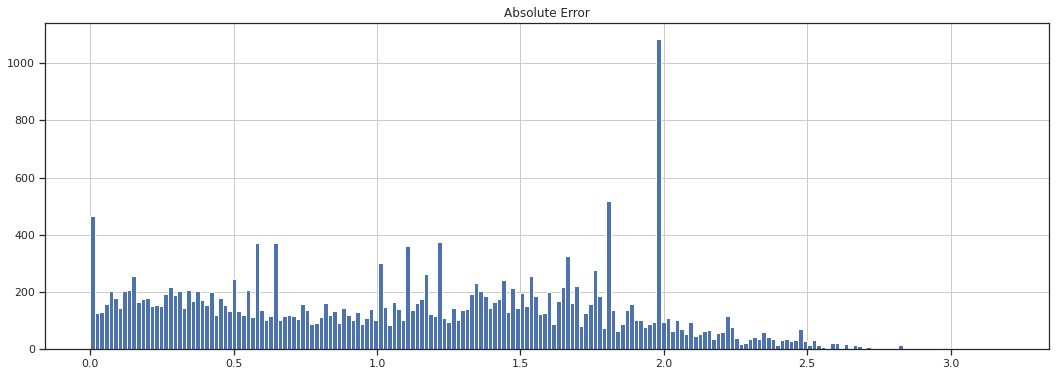

In [88]:
Result_baseline_only.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Normal Predictor:**

In [89]:
start_np = time.time()
algo_np = recommender('NormalPredictor')

algo_np.fit(trainset)
predictions_np = algo_np.test(testset)

Result_np = get_result(predictions_np,'NormalPredictor')
Result_np
end_np = time.time()
time_dict_of_models['NormalPredictor'] = end_np - start_np

RMSE: 2.0242


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3e52790>]],
      dtype=object)

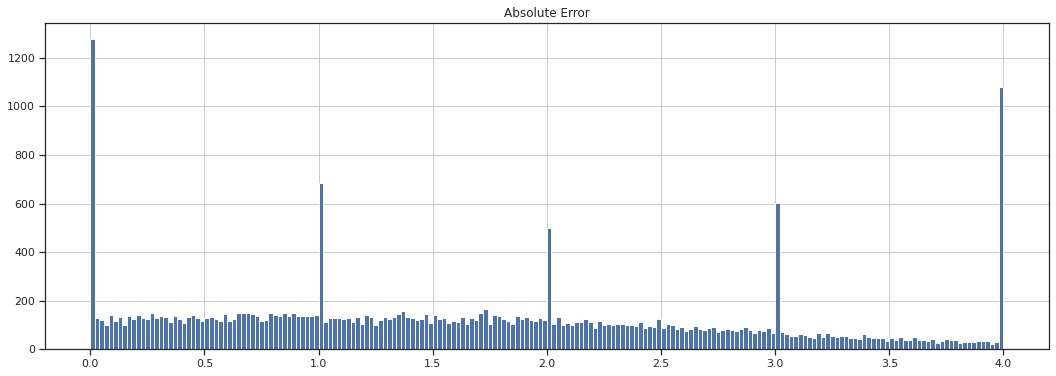

In [90]:
Result_np.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD:**

In [91]:
start_svd = time.time()
algo_svd = recommender('SVD')

algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

end_svd = time.time()
time_dict_of_models['SVD'] = end_svd - start_svd

In [92]:

Result_svd = get_result(predictions_svd,'SVD')
Result_svd

RMSE: 0.9598


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
19980,A3N3E6269BAXWN,B005KT4LK6,1.0,1.000000,1.0,0.000000,1
1653,A2D1G8A8OJHFTM,B0014CN8Y8,5.0,5.000000,5.0,0.000000,1
3564,A2R1NRGY7M9KCW,B0014CN8Y8,5.0,5.000000,5.0,0.000000,1
2525,A352S1XWW1BPA1,B002DHSQX6,1.0,1.000000,1.0,0.000000,1
22057,A1A5DWOTZU40ZX,B00DM8J11Q,5.0,5.000000,5.0,0.000000,1
...,...,...,...,...,...,...,...
15420,A1BOM2BKNNM4YU,B01BD6USBA,5.0,2.141024,2.0,2.858976,0
2577,AT5QGV4H95FZB,B009VBI88A,5.0,2.115070,2.0,2.884930,0
912,A56JERBN4BG1X,B005R597HA,5.0,2.039147,2.0,2.960853,0
23044,A4AM3UT22Z7WZ,B007PNX1AG,5.0,1.955377,2.0,3.044623,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3706b10>]],
      dtype=object)

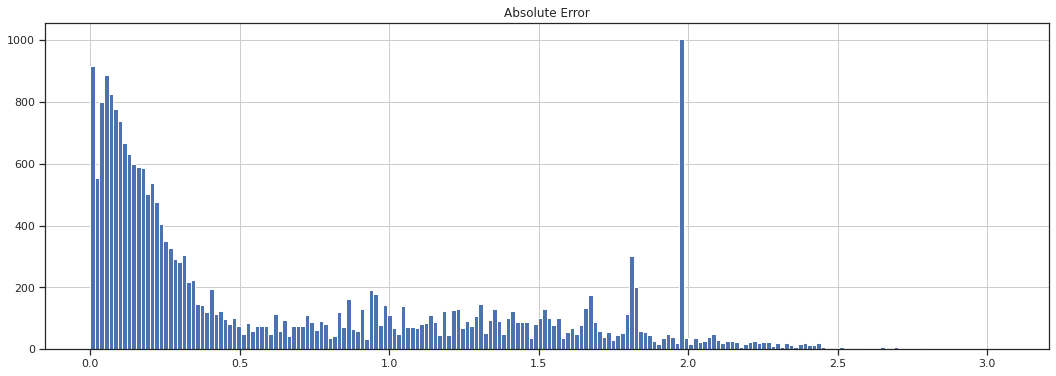

In [93]:
Result_svd.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD++**:


In [94]:
start_svdpp = time.time()
algo_svdpp = recommender('SVDpp')

algo_svdpp.fit(trainset)
predictions_svdpp = algo_svdpp.test(testset)

end_svdpp = time.time()
time_dict_of_models['SVDpp'] = end_svdpp - start_svdpp

In [95]:
Result_svdpp = get_result(predictions_svdpp,'SVDpp')
Result_svdpp

RMSE: 0.9149


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
17597,A2QXBWMBG8OXAU,B0014CN8Y8,5.0,5.0,5.0,0.0,1
19943,AILJSIF5PU67Q,B0042ACZU2,5.0,5.0,5.0,0.0,1
21107,A1ZMEHDKSVDG4B,B0045LLC7K,5.0,5.0,5.0,0.0,1
17641,A3VNUSX690Z8VQ,B001AZPW9S,5.0,5.0,5.0,0.0,1
12719,A1XHR39MLV04H0,B01CKFSCOS,5.0,5.0,5.0,0.0,1
...,...,...,...,...,...,...,...
12946,AHYHWNHA288VI,B000AST3AK,2.0,5.0,5.0,3.0,0
17779,A3PDS0P0NWXPC,B004UB1O9Q,2.0,5.0,5.0,3.0,0
12846,A3LL3NMYAR5INJ,B000AST3AK,2.0,5.0,5.0,3.0,0
6537,A2TFYTF9D35S87,B00INXG9MY,2.0,5.0,5.0,3.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a4052990>]],
      dtype=object)

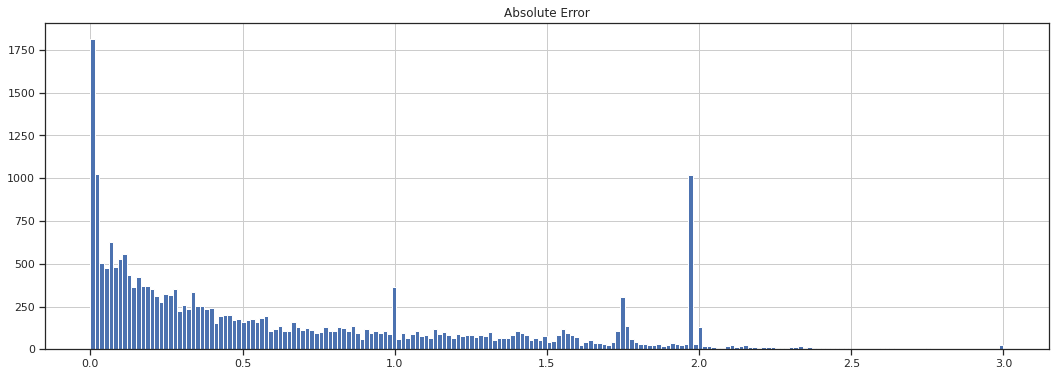

In [96]:
Result_svdpp.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBaseline**:

In [97]:
start_knn_baseline = time.time()
algo_knn_baseline = recommender('KNNBaseline')

algo_knn_baseline.fit(trainset)
predictions_knn_baseline = algo_knn_baseline.test(testset)


end_knn_baseline = time.time()
time_dict_of_models['KNNBaseline'] = end_knn_baseline - start_knn_baseline

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [98]:
Result_knn_baseline = get_result(predictions_knn_baseline,'KNNBaseline')
Result_knn_baseline

RMSE: 1.1042


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11793,A2XQAK0GDYKCCY,B0153PC5IG,1.0,1.000000,1.0,0.000000,1
13311,A2GYK69S4GCI9P,B004XLDE5A,4.0,4.000000,4.0,0.000000,1
13312,ARMX6BVYIGHPV,B00AF7UFI0,4.0,4.000000,4.0,0.000000,1
13313,A37V69J80ULPG6,B015GEQPVW,3.0,3.000000,3.0,0.000000,1
13317,A3JL00E11B31W,B00DM8JA80,4.0,4.000000,4.0,0.000000,1
...,...,...,...,...,...,...,...
23477,A1D19QMU5HFMD1,B00M0YXT0W,5.0,1.925902,2.0,3.074098,0
18761,A3JA523YV0UB28,B00IS93X22,5.0,1.917904,2.0,3.082096,0
8226,A2OFMBHNWAELN6,B01AYKYCSQ,5.0,1.853471,2.0,3.146529,0
3608,A3MIUC0O8EAJI4,B00C9YTN08,5.0,1.817814,2.0,3.182186,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a40f6b90>]],
      dtype=object)

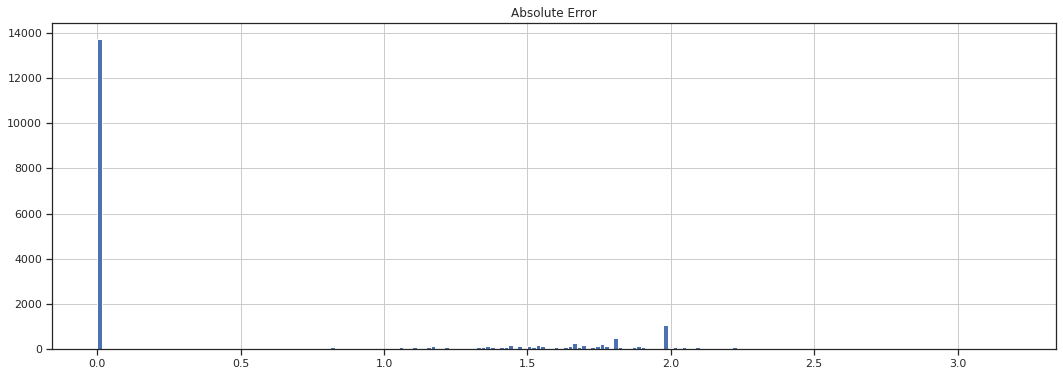

In [99]:
Result_knn_baseline.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBasic:**

In [100]:
start_knn_basic = time.time()
algo_knn_basic = recommender('KNNBasic')

algo_knn_basic.fit(trainset)
predictions_knn_basic = algo_knn_basic.test(testset)


end_knn_basic = time.time()
time_dict_of_models['KNNBasic'] = end_knn_basic - start_knn_basic

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [101]:
Result_knn_basic = get_result(predictions_knn_basic,'KNNBasic')
Result_knn_basic

RMSE: 1.2549


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11793,A2XQAK0GDYKCCY,B0153PC5IG,1.0,1.000000,1.0,0.000000,1
13693,A1S0P16TIUH3RV,B004W5WAMU,2.0,2.000000,2.0,0.000000,1
13696,A33QFH6KM2WH4J,B000HE5DNI,4.0,4.000000,4.0,0.000000,1
13697,A2RY308EG6XBGG,B01G4WRZTQ,4.0,4.000000,4.0,0.000000,1
13698,AW6FB87NE94AM,B0156NBIDS,4.0,4.000000,4.0,0.000000,1
...,...,...,...,...,...,...,...
21688,A3RNP2STY6M4G9,B013HNRQU8,1.0,3.142857,3.0,2.142857,0
12713,A1PKYBASHBCN1I,B001FREYN6,4.0,1.428571,1.0,2.571429,0
850,A2SET3T0N4IWSL,B002HT0958,5.0,2.000000,2.0,3.000000,0
912,A56JERBN4BG1X,B005R597HA,5.0,2.000000,2.0,3.000000,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3f342d0>]],
      dtype=object)

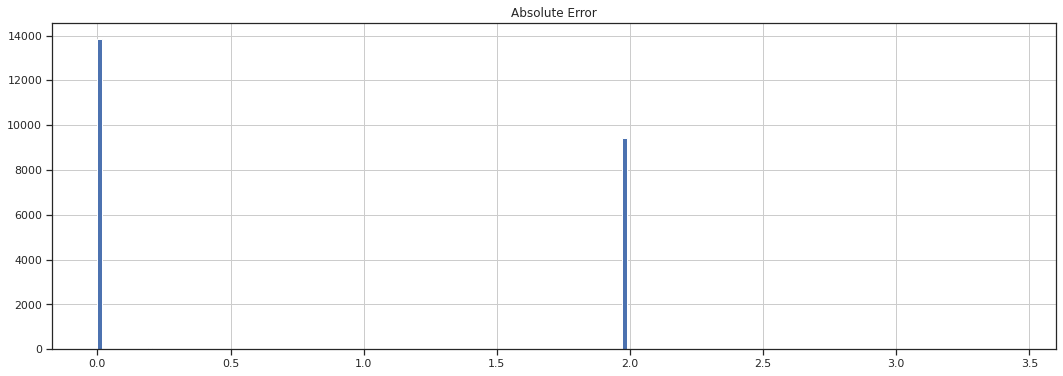

In [102]:
Result_knn_basic.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithMeans:**

In [103]:
start_knn_with_means = time.time()
algo_knn_with_means = recommender('KNNWithMeans')

algo_knn_with_means.fit(trainset)
predictions_knn_with_means = algo_knn_with_means.test(testset)


end_knn_with_means = time.time()
time_dict_of_models['KNNWithMeans'] = end_knn_with_means - start_knn_with_means

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [104]:
Result_knn_with_means = get_result(predictions_knn_with_means,'KNNWithMeans')
Result_knn_with_means

RMSE: 1.2499


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11793,A2XQAK0GDYKCCY,B0153PC5IG,1.0,1.0,1.0,0.0,1
13488,ACTEJKLDPM5XI,B00SPYDSFC,4.0,4.0,4.0,0.0,1
13491,A32GPC6R0C6X3R,B01111ZUII,1.0,1.0,1.0,0.0,1
13492,AN6PWAVKI6SEA,B0009GVYNW,1.0,1.0,1.0,0.0,1
13493,A5OT8JLCROTCL,B0178HI1WQ,3.0,3.0,3.0,0.0,1
...,...,...,...,...,...,...,...
10807,A9ZF6DA4R9O29,B004XLDYAA,5.0,1.0,1.0,4.0,0
14316,A2HV1E9LT9NCQX,B00MHID84I,5.0,1.0,1.0,4.0,0
8771,A2E44NHYXE9NOA,B00M107PQ4,5.0,1.0,1.0,4.0,0
16073,A15115MAQ51PQP,B000HZXC7Q,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a41f5790>]],
      dtype=object)

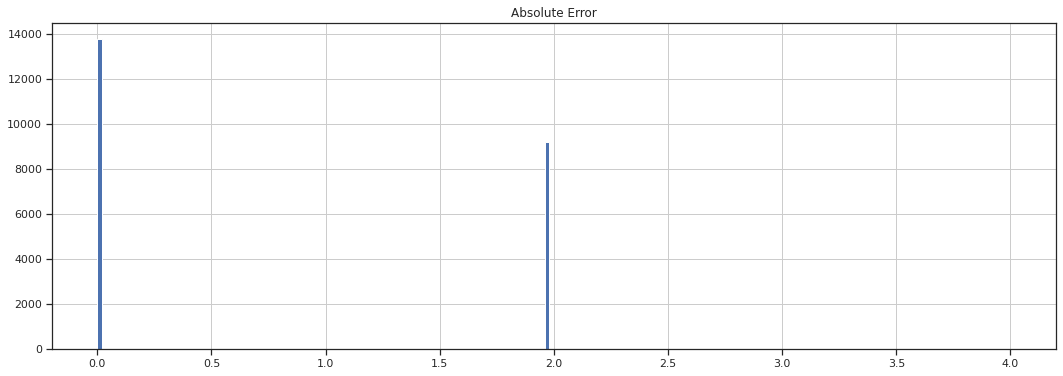

In [105]:
Result_knn_with_means.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithZScore:**

In [106]:
start_knn_with_zscore = time.time()
algo_knn_with_zscore = recommender('KNNWithZScore')

algo_knn_with_zscore.fit(trainset)
predictions_knn_with_zscore = algo_knn_with_zscore.test(testset)


end_knn_with_zscore = time.time()
time_dict_of_models['KNNWithZScore'] = end_knn_with_zscore - start_knn_with_zscore

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [107]:
Result_knn_with_zscore = get_result(predictions_knn_with_zscore,'KNNWithZScore')
Result_knn_with_zscore

RMSE: 1.2499


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11793,A2XQAK0GDYKCCY,B0153PC5IG,1.0,1.0,1.0,0.0,1
13497,A2Y5Q0LK1OGHET,B000BWI086,4.0,4.0,4.0,0.0,1
13499,A2PCPL6X55AOZN,B0167MXZKQ,1.0,1.0,1.0,0.0,1
13500,A3R26WYK0SU5ER,B00YPWI74U,2.0,2.0,2.0,0.0,1
13501,AOZQJL4Q6E72B,B00JQ1CXHW,2.0,2.0,2.0,0.0,1
...,...,...,...,...,...,...,...
16073,A15115MAQ51PQP,B000HZXC7Q,5.0,1.0,1.0,4.0,0
14316,A2HV1E9LT9NCQX,B00MHID84I,5.0,1.0,1.0,4.0,0
8771,A2E44NHYXE9NOA,B00M107PQ4,5.0,1.0,1.0,4.0,0
20607,A1J66APWHA7VNI,B00LDKFCFE,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a41fbfd0>]],
      dtype=object)

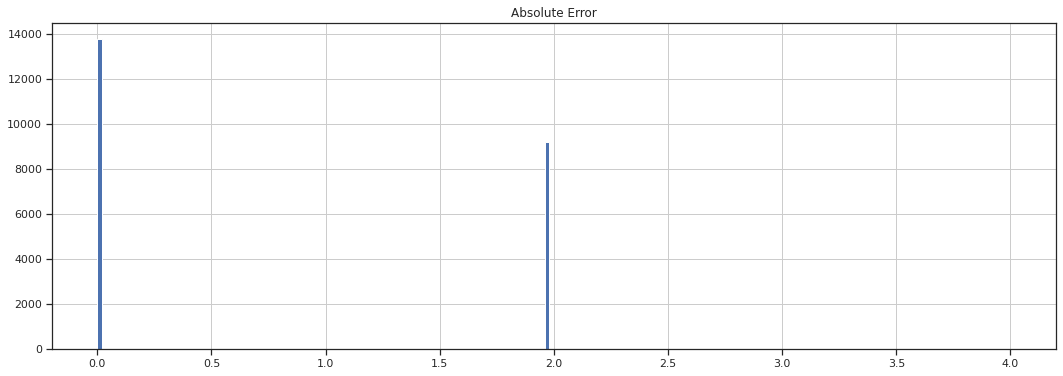

In [108]:
Result_knn_with_zscore.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Non-Negative Matrix Factorization:**

In [109]:
start_nmf = time.time()
algo_nmf = recommender('NMF')

algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)


end_nmf = time.time()
time_dict_of_models['NMF'] = end_nmf - start_nmf

In [110]:
Result_nmf = get_result(predictions_nmf,'NMF')
Result_nmf

RMSE: 1.2480


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
1546,AJB8YK57DZR16,B00UEZADIK,1.0,1.000000,1.0,0.000000,1
1872,AAH19N1XOPG5Z,B00BXX6BSS,1.0,1.000000,1.0,0.000000,1
13221,ANERZLT7ICQTD,B004XLDH84,1.0,1.000000,1.0,0.000000,1
13218,A14QPJWOJSJ5OP,B00M109AQM,1.0,1.000000,1.0,0.000000,1
13191,A2PFB4JGW31UY3,B00U4FT2NW,1.0,1.000000,1.0,0.000000,1
...,...,...,...,...,...,...,...
6731,A1O8WH7B1XJKNA,B00A8O03LE,5.0,1.173926,1.0,3.826074,0
15413,A1LRV4NVWF5B3H,B00DM8JFIK,5.0,1.124743,1.0,3.875257,0
8226,A2OFMBHNWAELN6,B01AYKYCSQ,5.0,1.000000,1.0,4.000000,0
15695,A39YC1ZYTJ5EH6,B004DNWVPC,5.0,1.000000,1.0,4.000000,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a43935d0>]],
      dtype=object)

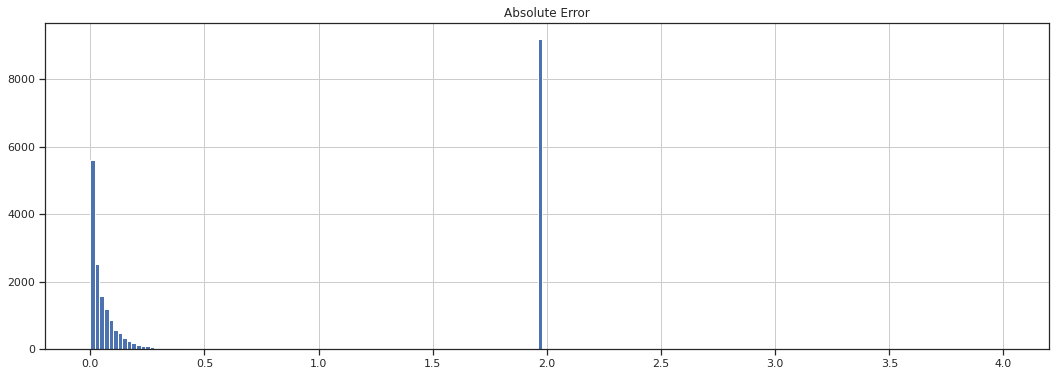

In [111]:
Result_nmf.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SlopeOne**:

In [112]:
start_slope_one = time.time()
algo_slope_one = recommender('SlopeOne')

algo_slope_one.fit(trainset)
predictions_slope_one = algo_slope_one.test(testset)


end_slope_one = time.time()
time_dict_of_models['SlopeOne'] = end_slope_one - start_slope_one

In [113]:
Result_slope_one = get_result(predictions_slope_one,'SlopeOne')
Result_slope_one

RMSE: 1.2409


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
11793,A2XQAK0GDYKCCY,B0153PC5IG,1.0,1.0,1.0,0.0,1
13801,A2Q7VD5NRGV11C,B003JN38PO,3.0,3.0,3.0,0.0,1
13802,A36N7YEQMB3Z98,B004XLDHCA,4.0,4.0,4.0,0.0,1
13805,A2CLWVBS6V1TJK,B001DEEU8K,1.0,1.0,1.0,0.0,1
13807,AJJMZL3L73BS0,B0164ET196,4.0,4.0,4.0,0.0,1
...,...,...,...,...,...,...,...
21465,A650B0DTFBW4E,B00DM8K72S,5.0,1.0,1.0,4.0,0
15695,A39YC1ZYTJ5EH6,B004DNWVPC,5.0,1.0,1.0,4.0,0
11093,A32HWONM6JSR5Q,B00DM8JK3A,5.0,1.0,1.0,4.0,0
8157,A37DS4YK0RYQS,B0156NFUV4,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3e19e10>]],
      dtype=object)

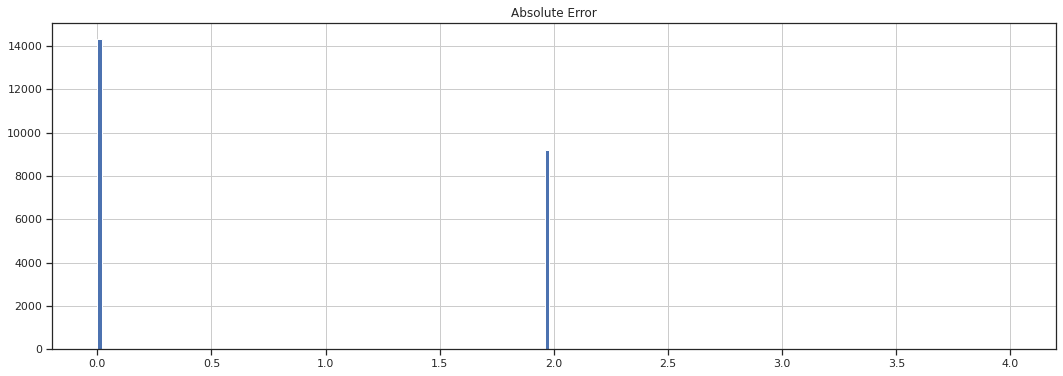

In [114]:
Result_slope_one.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **CoClustering:**

In [115]:
start_coclustering = time.time()
algo_coclustering = recommender('CoClustering')

algo_coclustering.fit(trainset)
predictions_coclustering = algo_coclustering.test(testset)

end_coclustering = time.time()
time_dict_of_models['CoClustring'] = end_coclustering - start_coclustering

In [116]:

Result_coclustering = get_result(predictions_coclustering,'CoClustering')
Result_coclustering

RMSE: 1.3677


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
13741,A1LWV5O33NCP7K,B0009GVYNW,5.0,5.000000,5.0,0.000000,1
20630,APFEQMTX550NE,B00006IV17,5.0,5.000000,5.0,0.000000,1
10350,A3RV47SFNFVJKB,B00GOFPA46,1.0,1.000000,1.0,0.000000,1
16226,A1CTQD21ASBNKA,B00COKDPUQ,1.0,1.000000,1.0,0.000000,1
4197,A1IW7SQX4GH7VX,B0002EAL58,5.0,5.000000,5.0,0.000000,1
...,...,...,...,...,...,...,...
15413,A1LRV4NVWF5B3H,B00DM8JFIK,5.0,1.508334,2.0,3.491666,0
11093,A32HWONM6JSR5Q,B00DM8JK3A,5.0,1.393250,1.0,3.606750,0
5127,A1J2SQGWOID8SZ,B0056I99WG,5.0,1.099344,1.0,3.900656,0
15695,A39YC1ZYTJ5EH6,B004DNWVPC,5.0,1.000000,1.0,4.000000,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a44cb550>]],
      dtype=object)

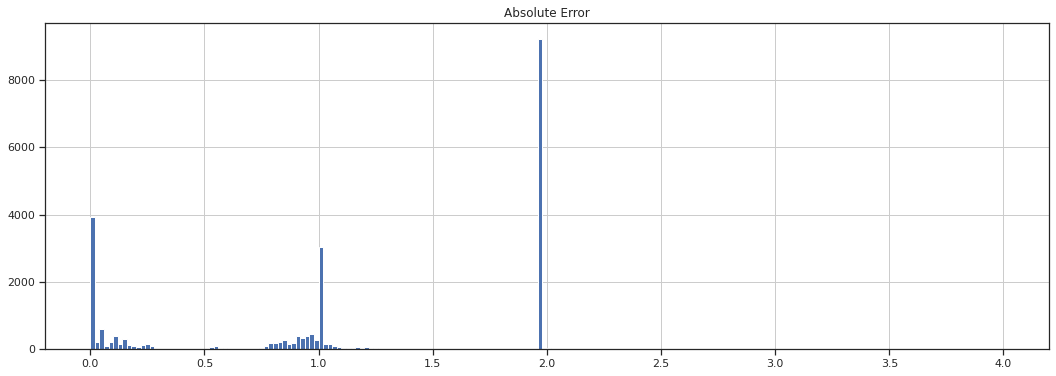

In [117]:
Result_coclustering.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Tabulated Results of Algorithms and the RMSE obtained:**

In [118]:
algorithms = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms)

tabular_summary = pd.DataFrame({"Recommender Algorithm":algorithms, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)

sorted_tabular_summary.index = list(range(1,no_of_algos+1))

cm = sns.light_palette("#2ecc90", as_cmap=True)


styler = sorted_tabular_summary.style
styler = styler.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler = styler.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
# styler = styler.background_gradient(cmap=cm)
styler = styler.set_precision(4)
display(styler)

,Recommender Algorithm,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,1.2409,0.7764,60.7682,3.4075
2,NMF,1.2480,0.8174,60.0856,15.1254
3,KNNWithZScore,1.2499,0.7930,59.7634,4.2370
4,KNNWithMeans,1.2499,0.7930,59.7126,3.9627
5,KNNBaseline,1.1042,0.6822,59.6363,5.6681
6,KNNBasic,1.2549,0.7989,59.4921,4.1999
7,SVD,0.9598,0.6725,57.9066,9.3768
8,SVDpp,0.9149,0.6486,55.5070,27.2192
9,CoClustering,1.3677,1.1105,28.3492,9.6946
10,BaselineOnly,1.3075,1.1174,24.7202,1.3085


# **Comparison of algorithms using RMSE:**

[Text(0, 0.5, 'Root Mean Squared Error'),
 Text(0.5, 0, 'Recommender Algorithm')]

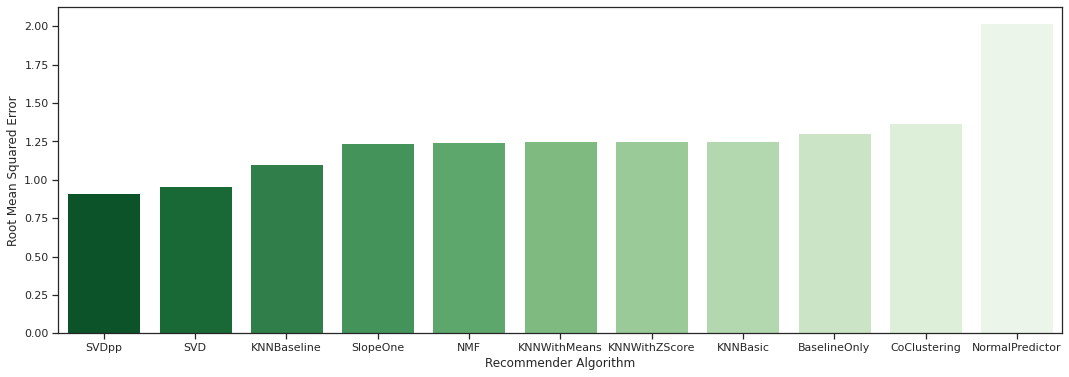

In [119]:
import matplotlib.pyplot as plt

Algorithm_Used = sorted(rmse_scores, key = rmse_scores.get)
RMSE_values = sorted(rmse_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = RMSE_values, palette='Greens_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Root Mean Squared Error')


# **Comparison of algorithms using MAE:**

[Text(0, 0.5, 'Mean Absolute Error'), Text(0.5, 0, 'Recommender Algorithm')]

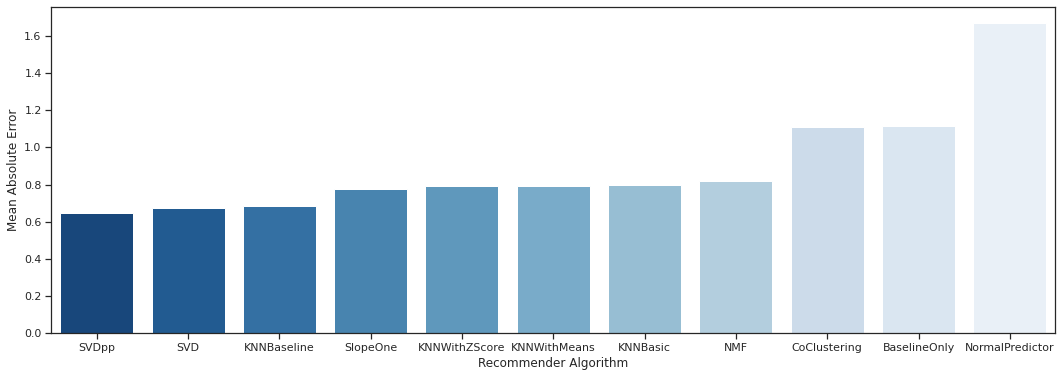

In [120]:

Algorithm_Used = sorted(mean_absolute_error, key = mean_absolute_error.get)
MAE_values = sorted(mean_absolute_error.values())
fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = MAE_values, palette='Blues_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Mean Absolute Error')


 


# **Comparison of algorithms using accuracy:** 

[Text(0, 0.5, 'Accuracy (in %)'), Text(0.5, 0, 'Recommender Algorithm')]

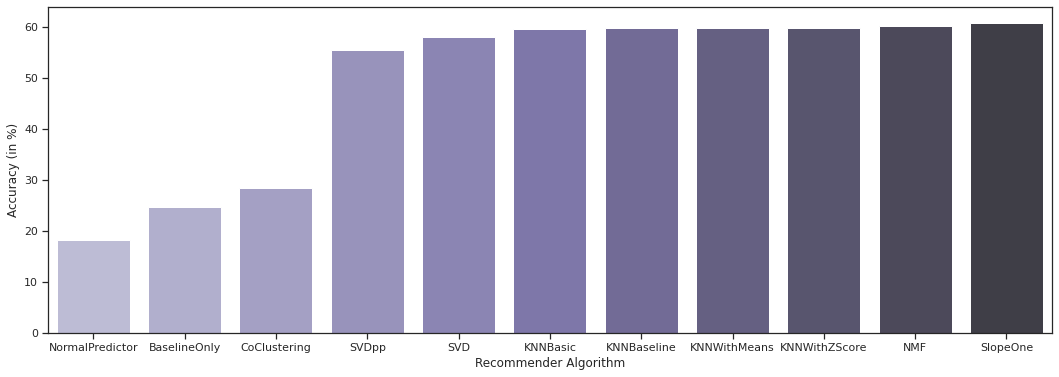

In [121]:

Algorithm_Used = sorted(accuracy_scores, key = accuracy_scores.get)
Accuracy_values = sorted(accuracy_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = Accuracy_values, palette='Purples_d')
ax.set(xlabel='Recommender Algorithm', ylabel='Accuracy (in %)')


# **Predicting top 'n' products for a user:**

top_n_recommender is a function that has 3 parameters. 
user_id is an input user_id for whom we want to recommend products.\
n_parameter is the number of 'top n' products we want to recommend.
chosen_algo is the algorithm that'll be used from surpriseLib for the predictions. 
The general idea used here, was to create a test set which comprises of all (user_id, item_id) combinations. That is, we are trying to predict the user_id's ratings for ALL items in our dataset. The predicted ratings are then sorted in descending order, and the top 'n_parameter' products are recommended.

If the user_id is not in the data set, 'Data of this user is unavailable' is displayed.

In [122]:
def top_n_recommender(user_id, n_parameter, chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  # items is a list of all products in our training data 
  items = np.unique(merged_data['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(appliances_metadata, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [123]:
top_n_recommender('A213L34F6YSKB7',5,'SlopeOne')


,Product ID,Title,Brand,Predicted Rating
0,B006E7X19A,SAMSUNG Assembly GUARD REF-R; AW2 - Part Numbe...,Samsung,4.0
1,B008D7T5BC,Honeywell 50027998-002 Water Level Sensor for ...,Honeywell,4.0
2,B00GNIWC40,FIREBIRD New 30&quot; European Style Wall Moun...,Firebird,4.0
3,B00M4LQEYO,AP3110929 - OEM FACTORY ORIGINAL WHIRLPOOL KEN...,Service Parts,4.0
4,B00MOCTU58,General Electric WR60X10255 Evaporator Fan Motor,GE,4.0


In [124]:
top_n_recommender('A213L34F6YSKB7',5,'CoClustering')

,Product ID,Title,Brand,Predicted Rating
0,B0016N3YXU,Air King AD1308 Advantage Ductless Under Cabin...,Air King,5.0
1,B005B48KMA,Whirlpool W10271507 Motor for Refrigerator,Whirlpool,5.0
2,B00AFSMH0S,LG Electronics 5001DD4001A 6026050 Dishwasher ...,LG,5.0
3,B00CXJPNTE,GE JT3500SFSS 30&quot; Stainless Steel Electri...,GE,5.0
4,B013P3JYB4,"Maytag Magic Chef Burner Assembly, Gray, 3412D...",Whirlpool,5.0


In [125]:
top_n_recommender('XYZ123',10,'SlopeOne')

'Data of this user is unavailable'

In [126]:
top_n_recommender('A20DZX38KRBIT8',10,'SVD')

'Data of this user is unavailable'

In [127]:
top_n_recommender('AZZ69W8AU7WTR',10,'CoClustering')

'Data of this user is unavailable'

top_n_recommender_best(user_id,n) recommends top 'n' products for the given user_id by calling the 'SlopeOne' algorithm, since it had the best accuracy.

In [128]:
def top_n_recommender_best(user_id,n):
  return top_n_recommender(user_id,n,'SlopeOne')

display_past_user_data(user_id) displays a data frame of all products that the user rated previously, sorted in descending order of Ratings.

In [129]:
def display_past_user_data(user_id):
  grouped_merged_data = merged_data.groupby('reviewerID')
  past_user_data = grouped_merged_data.get_group(user_id)
  past_user_data = past_user_data.drop(columns=['verified','style','reviewText','summary','also_buy','also_view','rank'])
  past_user_data = pd.DataFrame({"User ID":past_user_data['reviewerID'], "Item ID": past_user_data['Item ID'],
                                 "Title": past_user_data['title'],"Brand": past_user_data['brand'],"Rating":past_user_data['overall']})
  past_user_data_sorted = past_user_data.sort_values(by='Rating')
  past_user_data_sorted = past_user_data_sorted.drop_duplicates() 
  return past_user_data_sorted

display_past_user_data_top_n(user_id,n) displays the 'top n' products that the user rated previously.

In [130]:
def display_past_user_data_top_n(user_id,n):
  past_df = display_past_user_data(user_id)
  past_df = past_df.sort_values(by='Rating',ascending = False)

  return past_df.head(n)

get_no_of_items_previously_rated(user_id) returns the number of items that the given user_id previously rated.

In [131]:
def get_no_of_items_previously_rated(user_id):
  past_df = display_past_user_data(user_id)

  return len(past_df)


In [132]:
def evaluate(user_id,n):

  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data_top_n_df = display_past_user_data_top_n(user_id,n)
  count = 0
  for index, row in top_n_df.iterrows():

    for index_, row_ in past_user_data_top_n_df.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1

  print("Out of",len(past_user_data_top_n_df),"previously rated top items of user",user_id,",",count,"items were found.")
  


evaluator(user_id,n) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones.

In [133]:
def evaluator(user_id,n):
  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated
  

evaluator_by_algo(user_id,n,chosen_algo) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones, when the algorithm used for recommendations is 'chosen_algo'. This function will help us evaluate all the individual algorithms of surpriseLib later.

In [134]:
def evaluator_by_algo(user_id,n,chosen_algo):
  top_n_df = top_n_recommender(user_id,n,chosen_algo)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated

In [135]:
display_past_user_data('A213L34F6YSKB7')

,User ID,Item ID,Title,Brand,Rating
10439,A213L34F6YSKB7,B00E0CVZQC,Frigidaire 316207511 Control Board,Frigidaire,4.0


In [136]:
display_past_user_data_top_n('A213L34F6YSKB7',5)

,User ID,Item ID,Title,Brand,Rating
10439,A213L34F6YSKB7,B00E0CVZQC,Frigidaire 316207511 Control Board,Frigidaire,4.0


In [137]:
top_n_recommender_best('A213L34F6YSKB7',5)

,Product ID,Title,Brand,Predicted Rating
0,B006E7X19A,SAMSUNG Assembly GUARD REF-R; AW2 - Part Numbe...,Samsung,4.0
1,B008D7T5BC,Honeywell 50027998-002 Water Level Sensor for ...,Honeywell,4.0
2,B00GNIWC40,FIREBIRD New 30&quot; European Style Wall Moun...,Firebird,4.0
3,B00M4LQEYO,AP3110929 - OEM FACTORY ORIGINAL WHIRLPOOL KEN...,Service Parts,4.0
4,B00MOCTU58,General Electric WR60X10255 Evaporator Fan Motor,GE,4.0


In [138]:
evaluate('A213L34F6YSKB7',5)

Out of 1 previously rated top items of user A213L34F6YSKB7 , 0 items were found.


In [139]:
# Number of previously rated items found by the recommender
evaluator('A213L34F6YSKB7',5)

0

count_of_items_previously_rated is a dictionary where the keys are the user_id's and the values are the number of products that the user has rated.

In [140]:
count_of_items_previously_rated = dict(merged_data['reviewerID'].value_counts())
print(count_of_items_previously_rated)

{'A31Z7V5X5A3QYU': 8, 'A3GP2HMB2AFOKF': 7, 'A3H61AMBJ177DG': 7, 'A23KSPVPHZF6EO': 7, 'A2O7BWHBIV1HWZ': 6, 'A1NOI52YK8RCM7': 5, 'A1D81O63KFFOC3': 4, 'A2CLWWMSQN12ZX': 4, 'A352S1XWW1BPA1': 4, 'A37DQO5LU8DXTV': 4, 'AD3QP9YYXWW8R': 4, 'A22J3OCEN0J191': 4, 'AFUVGAUNQVT0S': 4, 'A3GI69YK7LBRND': 4, 'AQCQKR6T8LUNQ': 4, 'A1SHP5WYRKXDE7': 3, 'A2K4KHXTXOG7MD': 3, 'A13IPZHI0JH2U0': 3, 'ACKGGFKGVJIGN': 3, 'AJN2UVXBYI25V': 3, 'A1ODRTB0JZ9AER': 3, 'A254MDH9GJ1HQD': 3, 'A2GMDH40YSHZQT': 3, 'A2DNTFTG3SMV6': 3, 'A6C5WWXA97M5O': 3, 'AMDM41HD13K': 3, 'A1BY2A7W7HGUO2': 3, 'ADW698HCIL0LF': 3, 'A1J66APWHA7VNI': 3, 'A1DT687N3Z5KXG': 3, 'A3IH3LIIU0L7VE': 3, 'A27B7DRRZPH98Q': 3, 'A3J8IC20SGBS2O': 3, 'A2WI0X9OIH08FQ': 3, 'A26PI7WT3CJ31M': 3, 'AYRYO00OK1EZY': 3, 'A1NAMZ0688T2HI': 3, 'A1ZG62XDMN0IKQ': 3, 'APXFB9XWG4CNF': 3, 'A1R8FZDZ6YAU0R': 3, 'A28NLCSTVX5C7Q': 3, 'A1DL0C593ZIEYJ': 3, 'AEBJ3V81CCLJM': 3, 'A2NCW778KTTE11': 3, 'A3S732ARPD53UX': 3, 'A1P5WN345EBHDJ': 3, 'ALQ4QESI13ZHF': 3, 'A2CBN2619ZPFZX': 3, 'AIVRD

In [141]:
# Filtering the dictionary to retain only those users who rate more than 5 items.

filtered_dict = dict(filter(lambda x: x[1] >= 5,count_of_items_previously_rated.items()))
print(filtered_dict)

{'A31Z7V5X5A3QYU': 8, 'A3GP2HMB2AFOKF': 7, 'A3H61AMBJ177DG': 7, 'A23KSPVPHZF6EO': 7, 'A2O7BWHBIV1HWZ': 6, 'A1NOI52YK8RCM7': 5}


In [142]:
len(filtered_dict)

6

In [143]:
user_column = filtered_dict.keys()
user_column

dict_keys(['A31Z7V5X5A3QYU', 'A3GP2HMB2AFOKF', 'A3H61AMBJ177DG', 'A23KSPVPHZF6EO', 'A2O7BWHBIV1HWZ', 'A1NOI52YK8RCM7'])

In [144]:
no_of_items_previously_rated = filtered_dict.values()
no_of_items_previously_rated

dict_values([8, 7, 7, 7, 6, 5])

In [145]:
top_5_metrics = []
top_10_metrics = []
top_15_metrics = []
user_df_col = []

for user in user_column:
  top_5_val = evaluator(user,5)
  top_10_val = evaluator(user,10)
  top_15_val = evaluator(user,15)

  top_5_metrics.append(top_5_val)
  top_10_metrics.append(top_10_val)
  top_15_metrics.append(top_15_val)

  user_df_col.append(user)

In [146]:
evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})

evaluate_df shows us that for the 'SlopeOne' algorithm, for all users that had rated at least 5 items, how many products were previously rated in each of their 'Top 5', 'Top 10', 'Top 15' recommendations.

In [147]:
evaluate_df

,USER ID,Number of previously rated items in Top 5,Number of previously rated items in Top 10,Number of previously rated items in Top 15,No. of items previously rated
0,A31Z7V5X5A3QYU,0,0,0,8
1,A3GP2HMB2AFOKF,0,0,0,7
2,A3H61AMBJ177DG,0,0,0,7
3,A23KSPVPHZF6EO,0,0,0,7
4,A2O7BWHBIV1HWZ,0,0,0,6
5,A1NOI52YK8RCM7,2,2,2,5


In [148]:
mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

In [149]:
print("The mean Number of previously rated items in the top 5 recommended products is:", round(mean_number_of_prev_rated_items_in_top_5,4))

The mean Number of previously rated items in the top 5 recommended products is: 0.3333


In [150]:
print("The mean Number of previously rated items in the top 10 recommended products is:", round(mean_number_of_prev_rated_items_in_top_10,4) )

The mean Number of previously rated items in the top 10 recommended products is: 0.3333


In [151]:
print("The mean Number of previously rated items in the top 15 recommended products is:", round(mean_number_of_prev_rated_items_in_top_15,4) )

The mean Number of previously rated items in the top 15 recommended products is: 0.3333


# **Category based recommender:**

top_n_products_by_category(n_parameter,category,user_id,chosen_algo) returns the best 'n_parameter' products for a given 'user_id', from the input 'category' when the algorithm used for making recommendation is 'chosen_algo'. The idea used here was to create a test set comprising of all combinations of (user_id,item_id), where the user_id is the input user_id, and item_id's are ALL items that are from the input 'category'. The items are then sorted in descending order of predicted ratings and the top 'n_paramater' items are displayed.

In [152]:
def top_n_products_by_category(n_parameter,category,user_id,chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  if category not in final_list_of_categories:
    return "Category is not present"

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  merged_data_filtered_by_category = merged_data[merged_data['Category of appliances'] == category]

  # items is a list of all products in our training data, filtered by the chosen category
  items = np.unique(merged_data_filtered_by_category['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(merged_data, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Category":pretty_result['Category of appliances'],
                              "Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [153]:
top_n_products_by_category(5,'Parts & Accessories','A213L34F6YSKB7','SVD')

,Product ID,Title,Brand,Category,Predicted Rating
0,B00DM8J11Q,Supco LP338 Agitator Dogs For Whirlpool 285770...,Supco,Parts & Accessories,4.843249
1,B00MU2WHFM,2187172 Refrigerator Door Bin Deep,ERP,Parts & Accessories,4.837183
2,B0053F80JA,Whirlpool 3406107 Door Switch for Dryer,Whirlpool,Parts & Accessories,4.812427
3,B00W0YO9GK,"Refresh Replacement for Frigidaire WF1CB, RF10...",Refresh,Parts & Accessories,4.753689
4,B01CTNA1VI,Capparis Kitchen Silicone Stove Counter Gap Co...,Capparis,Parts & Accessories,4.692790


top_n_products_by_category_best(user_id, n_parameter, category) just calls the previous function, with the 'SlopeOne' algorithm making the predictions.

In [154]:
def top_n_products_by_category_best(user_id, n_parameter, category):
  return top_n_products_by_category(n_parameter, category, user_id, 'SlopeOne')

In [155]:
top_n_products_by_category_best('A213L34F6YSKB7',5,'Parts & Accessories')

,Product ID,Title,Brand,Category,Predicted Rating
0,B0022ZRGJE,WaterSentinel WSS-1 Made in USA Refrigerator R...,WaterSentinel,Parts & Accessories,4.0
1,B001DPFP88,AE-Select 285785 Washer Clutch Kit for Whirlpool,Whirlpool,Parts & Accessories,4.0
2,B00L4G7ZXE,Whirlpool W10205979 Motor Ice Door,Whirlpool,Parts & Accessories,4.0
3,B00LQDBF2M,General Electric WR12X20141 Handle Door,GE,Parts & Accessories,4.0
4,B01AJ7FROC,"Frigidaire 5304496284 Defrost Heater Assembly,...",Frigidaire,Parts & Accessories,4.0


## **Cross-Category Top Products:**

### **Returns 'no_of_products_from_a_category' products from all categories, given a USER ID.**

In [156]:
def cross_category_top_n_recommender(user_id, no_of_products_from_a_category):
  # empty data frame for storing results
  output_df = pd.DataFrame()
  # empty list for storing data frame of 'no_of_products_from_a_category' for each category
  category_wise_dfs = []
  # first step: call top_n_products_by_category, for 'no_of_products_from_a_category', for every category
  for cat in final_list_of_categories:
    top_products_of_current_category = top_n_products_by_category_best(user_id, no_of_products_from_a_category, cat)
    category_wise_dfs.append(top_products_of_current_category)

  output_df = pd.concat(category_wise_dfs)

  output_df.reset_index(drop=True,inplace=True)
  return output_df
    


In [157]:
cross_category_top_n_recommender('A213L34F6YSKB7', 2)

,Product ID,Title,Brand,Category,Predicted Rating
0,B00M3EFSF8,Bosch SHP68T55UC Built-In Dishwasher,Bosch,Dishwashers,4.0
1,B00FGWUWA0,18&quot; Built-In Dishwasher Finish: White,Avanti,Dishwashers,4.0
2,B00L4G98N4,"General Electric WC60X10005 Compactor Bags, Bo...",GE,Garbage Disposals & Compactors,4.0
3,B00KWMK4B6,HSM V-Press 860 P Baler,HSM,Garbage Disposals & Compactors,4.0
4,B001HK4NJG,Maytag Performance Series,Maytag,Laundry Appliances,4.0
5,B00FGWUF0C,Bosch WTB86200UC 300 4.0 Cu. Ft. White Stackab...,Bosch,Laundry Appliances,4.0
6,B001DPFP88,AE-Select 285785 Washer Clutch Kit for Whirlpool,Whirlpool,Parts & Accessories,4.0
7,B00L4G7ZXE,Whirlpool W10205979 Motor Ice Door,Whirlpool,Parts & Accessories,4.0
8,B00TQZBKRM,Thermador SC272ZP double wall Electric oven St...,Thermador,"Ranges, Ovens & Cooktops",4.0
9,B00VC2T4B6,W10308477 Bake Element for WHIRLPOOL OVEN,EDGEWATER PARTYS,"Ranges, Ovens & Cooktops",4.0


### **Return 'no_of_products' products from only top 'n_parameter' categories, given a USER ID.**

Products are grouped by category, the mean of predicted ratings is calculated for every group, and the top 'n_parameter' categories with 'no_of_products' in each category are displayed, given a USER ID.

In [158]:
def best_cross_category_top_n_recommender (no_of_products, n_parameter, user_id):
  df_of_no_of_products_from_all_categories = cross_category_top_n_recommender(user_id, no_of_products)

  # grouping the above by category

  grouped_df = df_of_no_of_products_from_all_categories.groupby( by = 'Category')

  category_dict = defaultdict(list)
  # category_dict is a dictionary where the key is the category and the value is the mean predicted rating of the 'no_of_products' products
  for cat in final_list_of_categories:
    # category_grouped_df is a dataframe of 'no_of_products' products from the current category, for the given user
    category_grouped_df = grouped_df.get_group(cat)

    category_dict[cat] = category_grouped_df['Predicted Rating'].mean()

  category_dict_sorted = sorted(category_dict.items(), key = lambda x: x[1], reverse=True)

  temp = category_dict_sorted[:n_parameter]

  top_categories_for_user = []

  for _ in temp:
    top_categories_for_user.append(_[0])

  # top_categories_for_user stores the best 'n_parameter' categories for the given user

  x = []
  for cat in top_categories_for_user:
    df = grouped_df.get_group(cat)
    x.append(df)
    # appending the data frames relevant to each top category to 'x'

  output_df = pd.concat(x)
  output_df.reset_index(drop=True, inplace=True)
  return output_df


In [159]:
best_cross_category_top_n_recommender(4, 3, 'A213L34F6YSKB7')


,Product ID,Title,Brand,Category,Predicted Rating
0,B000UVR4GM,Bosch SHE45M06UC Dishwasher with 4 Wash Cycles...,Bosch,Dishwashers,4.0
1,B002KKUWWY,Bosch : SHE55M12UC 24 Evolution 500 Series Ful...,Bosch,Dishwashers,4.0
2,B00M3EFSF8,Bosch SHP68T55UC Built-In Dishwasher,Bosch,Dishwashers,4.0
3,B00FGWUWA0,18&quot; Built-In Dishwasher Finish: White,Avanti,Dishwashers,4.0
4,B001PN4RU0,Broan 15&quot; Trash Compactor - Stainless Ste...,Broan,Garbage Disposals & Compactors,4.0
5,B00L4G98N4,"General Electric WC60X10005 Compactor Bags, Bo...",GE,Garbage Disposals & Compactors,4.0
6,B01G7NYB1W,Univerayo 20191218 Pest Repellent (Black),Univerayo,Garbage Disposals & Compactors,4.0
7,B00KWMK4B6,HSM V-Press 860 P Baler,HSM,Garbage Disposals & Compactors,4.0
8,B001HK4NJG,Maytag Performance Series,Maytag,Laundry Appliances,4.0
9,B005KT4IZE,Whirlpool WTW8200YW Cabrio 4.6 Cu. Ft. White T...,Whirlpool,Laundry Appliances,4.0


## **Evaluating every algorithm:**

In [160]:
# list of all algorithms in surpriseLib
algorithms = ['SlopeOne','SVD','SVDpp','NMF','KNNBasic','KNNBaseline','KNNWithMeans','KNNWithZScore','CoClustering','NormalPredictor','BaselineOnly']

# initialising empty lists for the eventual output data frame
final_df_algo_col = []
final_df_top5_metric_col = []
final_df_top10_metric_col = []
final_df_top15_metric_col = []

# looping through every algorithm
for chosen_algo in algorithms:
  top_5_metrics = []
  top_10_metrics = []
  top_15_metrics = []
  user_df_col = []

  # looping through all those user IDs that have rated more than 10 products
  for user in user_column:

    # top_5_val stores the Number of items out of the 5 'top 5' items recommended,
    # that were previously rated by the user
    top_5_val = evaluator_by_algo(user,5,chosen_algo)

    # Similarly, top_10_val, top_15_val, etc.
    top_10_val = evaluator_by_algo(user,10,chosen_algo)
    top_15_val = evaluator_by_algo(user,15,chosen_algo)

    # These values are appended to lists
    top_5_metrics.append(top_5_val)
    top_10_metrics.append(top_10_val)
    top_15_metrics.append(top_15_val)

    user_df_col.append(user)
  
  # evaluate_df has 4 columns. 

  # 'USER ID' is a list of all users who have rated more than 10 items.

  # 'Number of previously rated items in Top 5' gives the Number of items previously rated
  # by the user, that was present in the 5 'Top 5' products recommended to this user.
  # this is done for every user in the 'USER ID' column

  # Similarly, 'Number of previously rated items in Top 10' and 'Number of previously rated items in Top 15'

  evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})
  
  # The mean of each of these columns is calculated.
  # E.g. 'mean_number_of_prev_rated_items_in_top_5' stores the mean Number of 
  # previously rated items in the 5 'Top 5' products, for all the users who rated more than 10 items,
  # for the current algorithm.
  mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
  mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
  mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

  # The current algorithm is appended to a list
  final_df_algo_col.append(chosen_algo)

  # The metrics are appended to respective lists
  final_df_top5_metric_col.append(mean_number_of_prev_rated_items_in_top_5)
  final_df_top10_metric_col.append(mean_number_of_prev_rated_items_in_top_10)
  final_df_top15_metric_col.append(mean_number_of_prev_rated_items_in_top_15)

# The final data frame of all the calculations is created.
final_df = pd.DataFrame({"Algorithm": final_df_algo_col, 
                         "Mean Number of previously rated items in Top 5":final_df_top5_metric_col, 
                         "Mean Number of previously rated items in Top 10":final_df_top10_metric_col,
                         "Mean Number of previously rated items in Top 15":final_df_top15_metric_col})

final_df

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15
0,SlopeOne,0.333333,0.333333,0.333333
1,SVD,0.000000,0.000000,0.000000
2,SVDpp,0.166667,0.333333,0.333333
3,NMF,0.333333,0.333333,0.333333
4,KNNBasic,2.666667,3.666667,4.166667
5,KNNBaseline,2.500000,3.166667,3.333333
6,KNNWithMeans,0.000000,0.000000,0.000000
7,KNNWithZScore,0.000000,0.000000,0.000000
8,CoClustering,0.000000,0.000000,0.000000
9,NormalPredictor,0.000000,0.000000,0.000000


# **Summary of results:**

In [161]:

final_df.index = list(range(1,len(algorithms)+1))
algorithms_all = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms_all)

tabular_summary = pd.DataFrame({"Algorithm":algorithms_all, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)
output_df = pd.merge(final_df,sorted_tabular_summary, on = 'Algorithm')
output_df = output_df.sort_values( by = 'Accuracy (in %)', ascending=False)
output_df.index = list(range(1,len(algorithms_all)+1))
cm = sns.light_palette("#2ecc90", as_cmap=True)


styler_obj = output_df.style
styler_obj = styler_obj.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler_obj = styler_obj.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
styler_obj = styler_obj.background_gradient(cmap=cm)
styler_obj = styler_obj.set_precision(4)
display(styler_obj)

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,0.3333,0.3333,0.3333,1.2409,0.7764,60.7682,3.4075
2,NMF,0.3333,0.3333,0.3333,1.2480,0.8174,60.0856,15.1254
3,KNNWithZScore,0.0000,0.0000,0.0000,1.2499,0.7930,59.7634,4.2370
4,KNNWithMeans,0.0000,0.0000,0.0000,1.2499,0.7930,59.7126,3.9627
5,KNNBaseline,2.5000,3.1667,3.3333,1.1042,0.6822,59.6363,5.6681
6,KNNBasic,2.6667,3.6667,4.1667,1.2549,0.7989,59.4921,4.1999
7,SVD,0.0000,0.0000,0.0000,0.9598,0.6725,57.9066,9.3768
8,SVDpp,0.1667,0.3333,0.3333,0.9149,0.6486,55.5070,27.2192
9,CoClustering,0.0000,0.0000,0.0000,1.3677,1.1105,28.3492,9.6946
10,BaselineOnly,0.1667,0.1667,0.1667,1.3075,1.1174,24.7202,1.3085


In [162]:
end_all = time.time()

In [163]:
total_time_taken = end_all - start_all

In [164]:
print("The total time taken for the entire code to run is:", total_time_taken ,"seconds i.e.",total_time_taken/60, "minutes.")


The total time taken for the entire code to run is: 730.3351428508759 seconds i.e. 12.172252380847931 minutes.
